# Machine Learning And Artificial Intelligence for Prediction of OPC Strength, RAC Strength, RAC Carbonization, RAC Chloride Erosion & RAC Sulfate Corrosion

### Library Imports

In [1]:
import sys,os
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

### Datasheet Imports

In [3]:
#detailed_rac = pd.read_csv("Materials 1645501 DataSheetold.csv")
carbonization_rac = pd.read_csv("Carbonization_Experimental_data.csv")
chloride_ion_erosion_rac = pd.read_csv("Chloride_Ion_Erosion_Experimental_data.csv")
sulfate_corrosion_rac = pd.read_csv("Sulfate_Corrosion_Experimental_data.csv")
cs = pd.read_csv("Concrete_Data.csv")

In [4]:
detailed_rac = pd.read_csv("Materials 1771857 Datasheet.csv")

         Sulfate Corrosion Categorical To Continuous Conversion Done In Excel for Machine Learning

(Cation Type)
Na Class Variable >> 1
Mg Class Variable >> 2

(Immersion Type)
Full Immersion >> 1
Dry-Wet Cycle >> 2

### Statistical Visualization

##### Descriptive Statistics to see the distribution of various parameters

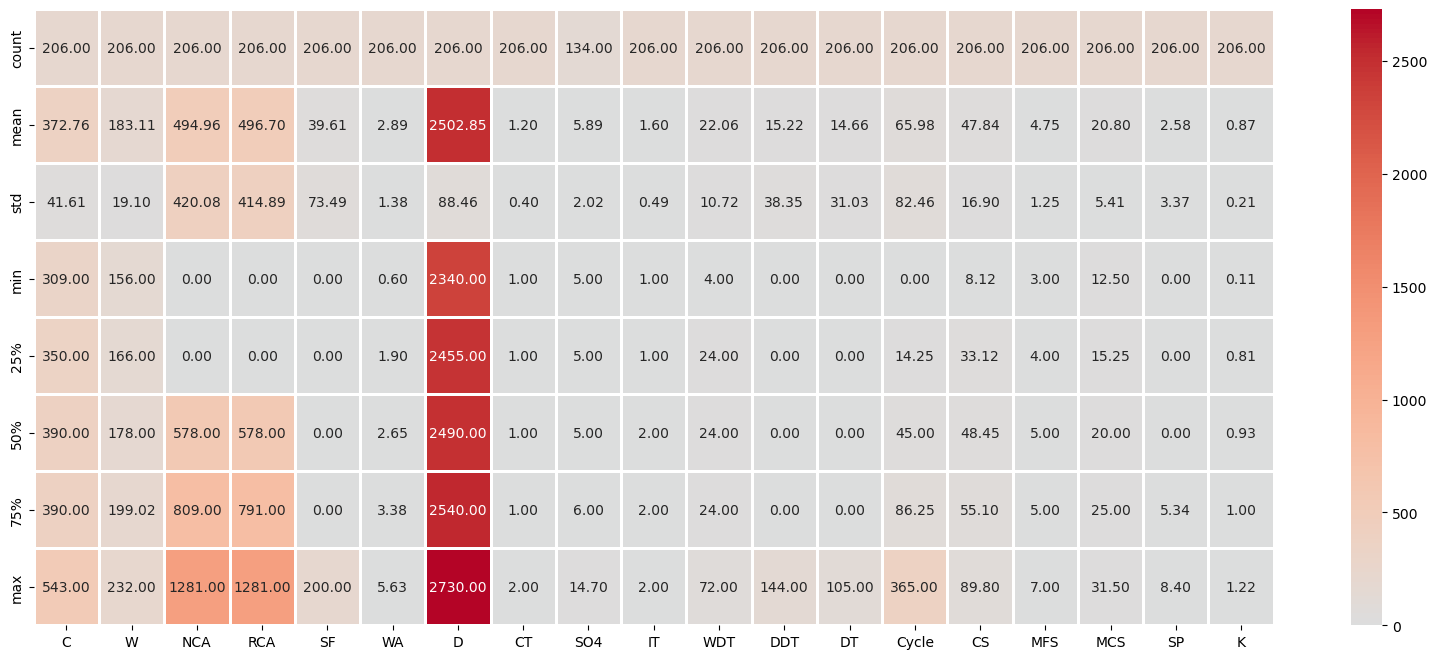

In [5]:
data = sulfate_corrosion_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

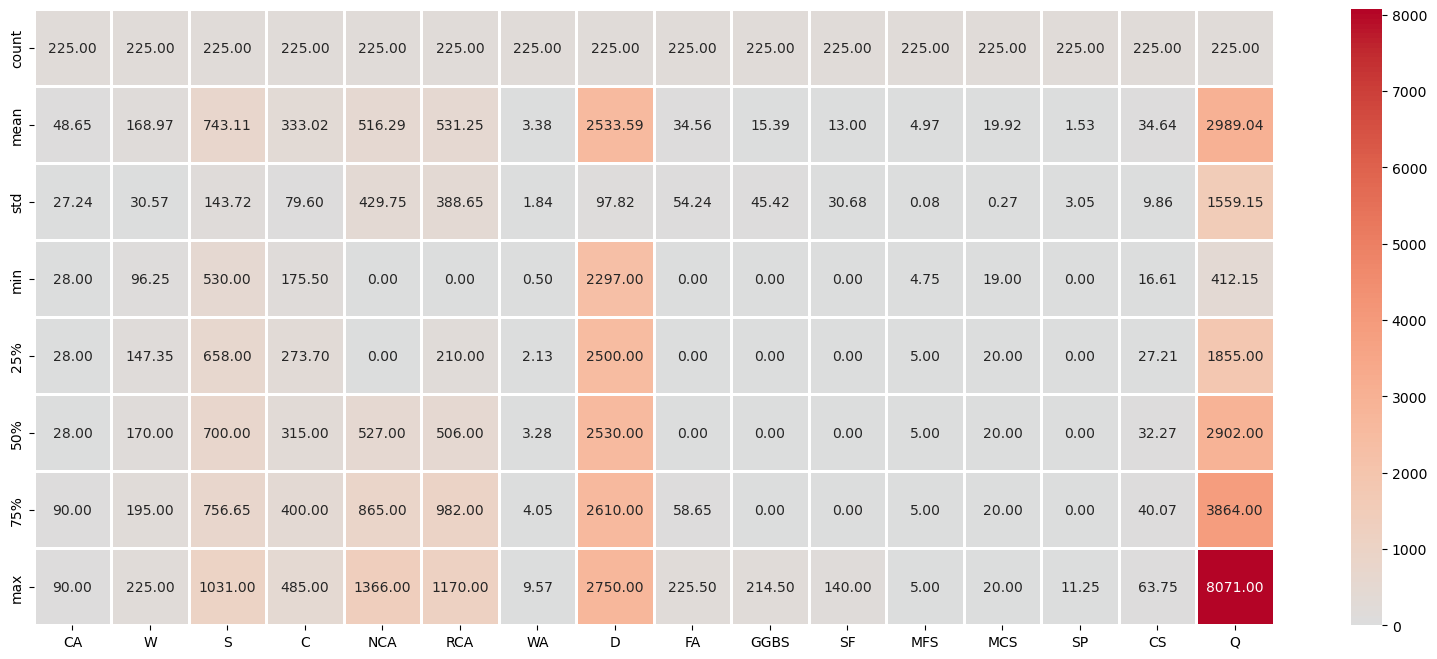

In [6]:
data = chloride_ion_erosion_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

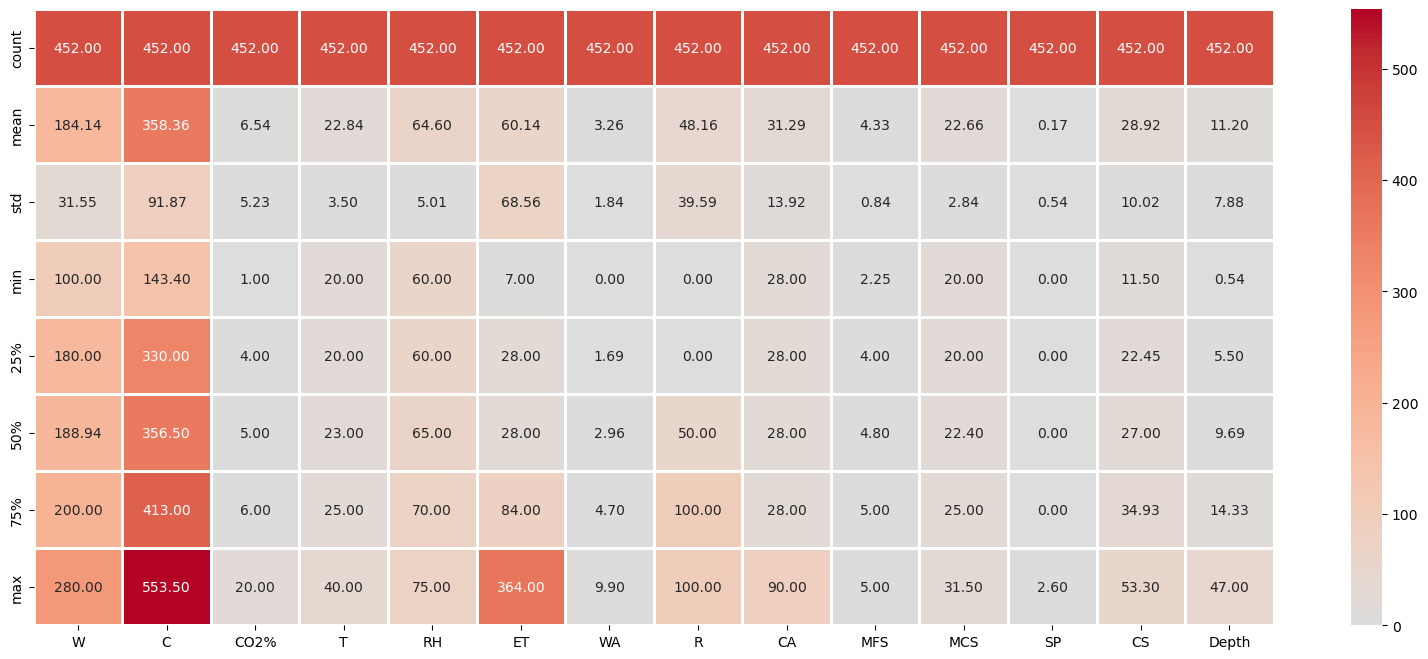

In [7]:
data = carbonization_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

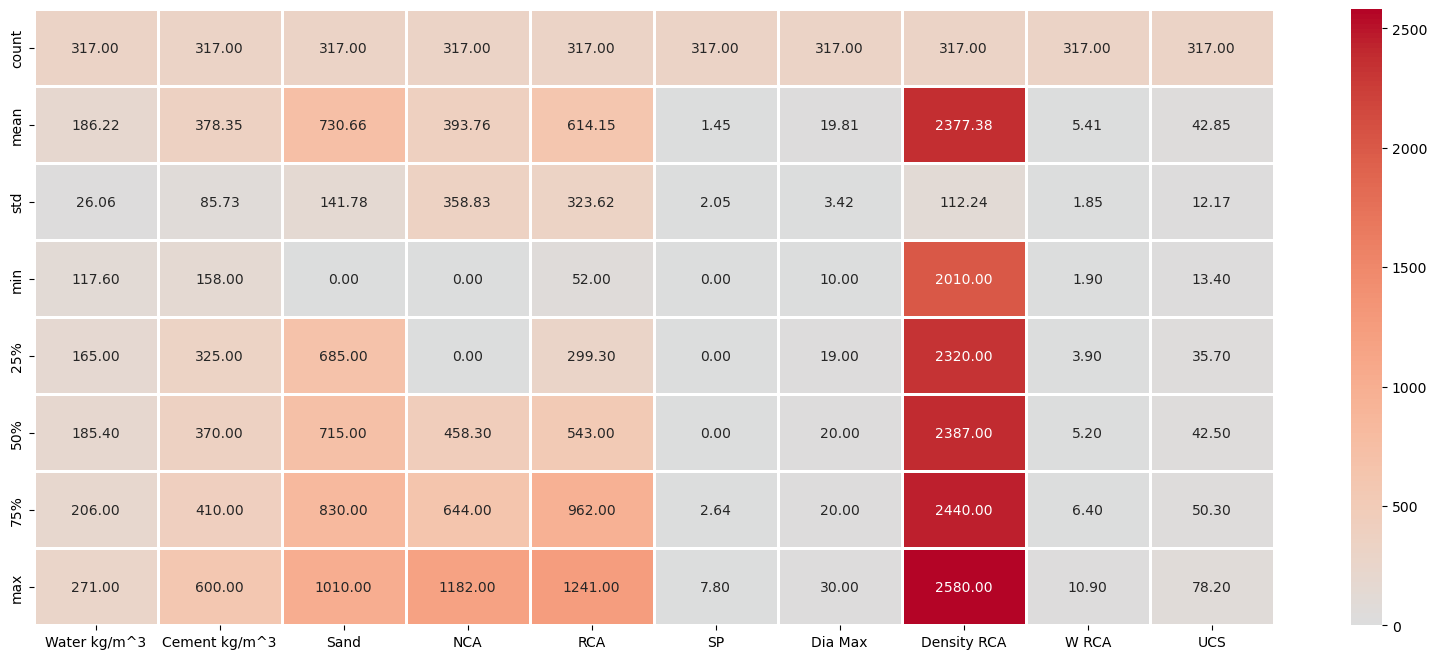

In [8]:
data = detailed_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

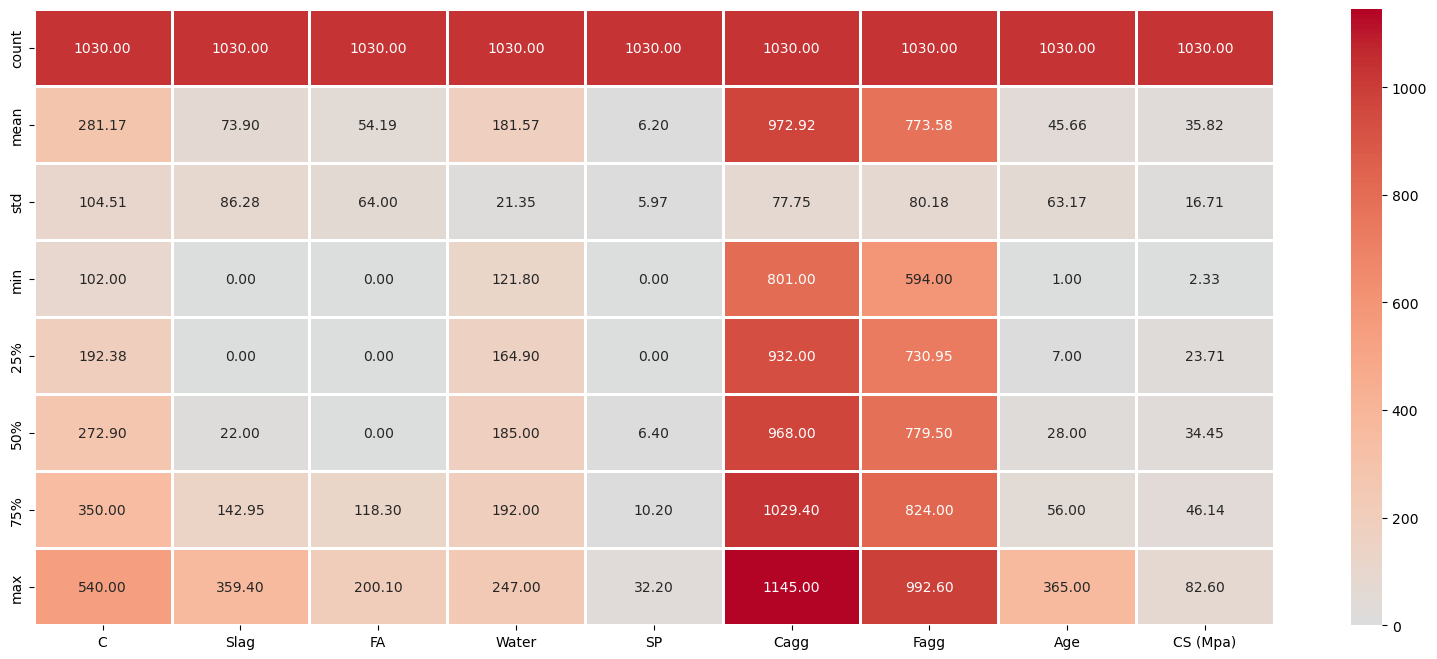

In [9]:
data = cs.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

##### Printing the first few records to see the data has been imported correctly

In [10]:
sulfate_corrosion_rac.head(5)

C      W    NCA    RCA   SF   WA       D  CT  SO4  IT  WDT  DDT  DT  \
0  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
1  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
2  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
3  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
4  350  176.0    0.0  791.0  140  2.5  2540.0   1  5.0   1   24    0   0   

   Cycle     CS  MFS   MCS   SP     K  
0      0  48.18  3.0  15.0  7.0  1.00  
1     90  48.18  3.0  15.0  7.0  0.93  
2    180  48.18  3.0  15.0  7.0  0.83  
3    360  48.18  3.0  15.0  7.0  0.76  
4      0  51.43  3.0  15.0  7.0  1.00

In [11]:
chloride_ion_erosion_rac.head(5)

CA      W      S      C     NCA     RCA    WA     D     FA  GGBS   SF  MFS  \
0  28  225.0  642.0  410.0  1048.0     0.0  1.11  2620    0.0   0.0  0.0  5.0   
1  28  225.0  642.0  410.0   524.0   506.0  3.54  2520    0.0   0.0  0.0  5.0   
2  28  225.0  642.0  410.0     0.0  1017.0  5.96  2410    0.0   0.0  0.0  5.0   
3  28  225.0  611.0  307.5  1048.0     0.0  1.11  2620  102.5   0.0  0.0  5.0   
4  28  225.0  611.0  307.5   524.0   506.0  3.54  2520  102.5   0.0  0.0  5.0   

   MCS   SP     CS       Q  
0   20  0.0  35.09  6287.0  
1   20  0.0  30.69  6715.0  
2   20  0.0  27.51  6910.0  
3   20  0.0  31.48  4204.0  
4   20  0.0  30.11  4710.0

In [12]:
carbonization_rac.head(5)

W      C  CO2%   T  RH  ET    WA      R  CA  MFS   MCS   SP     CS  \
0  170.0  425.0  10.0  40  70  28  0.94    0.0  28  5.0  20.0  0.0  38.48   
1  170.0  425.0  10.0  40  70  28  3.96  100.0  28  5.0  20.0  0.0  38.48   
2  175.0  318.0  10.0  40  70  28  0.94    0.0  28  5.0  20.0  0.0  38.48   
3  175.0  318.0  10.0  40  70  28  4.38  100.0  28  5.0  20.0  0.0  53.30   
4  175.0  318.0  10.0  40  70  28  3.30  100.0  28  5.0  20.0  0.0  38.48   

   Depth  
0   1.63  
1   3.08  
2   8.66  
3  10.28  
4  10.16

In [13]:
detailed_rac

Ref  Water kg/m^3  Cement kg/m^3   Sand    NCA     RCA    SP  Dia Max  \
0     [1]         165.0            370  650.0  850.5   364.5  2.22       20   
1     NaN         165.0            370  650.0  607.5   607.5  2.22       20   
2     NaN         165.0            370  650.0    0.0  1215.0  2.22       20   
3     NaN         165.0            460  575.0  850.5   364.5  2.22       20   
4     NaN         165.0            460  575.0  607.5   607.5  2.22       20   
..    ...           ...            ...    ...    ...     ...   ...      ...   
312   NaN         190.4            280  873.0    0.0   962.0  0.00       22   
313   NaN         157.5            350  858.0    0.0  1016.0  3.50       22   
314  [33]         179.0            275  878.0  735.0   184.0  0.00       19   
315   NaN         179.0            275  849.0  455.0   455.0  0.00       19   
316   NaN         179.0            275  868.0    0.0   830.0  0.00       19   

     Density RCA  W RCA   UCS  
0           2400    4.9  50.6  
1           2400    4.9  50.8  
2           2400    4.9  50.2  
3           2400    4.9  60.8  
4           2400    4.9  61.2  
..           ...    ...   ...  
312         2458    5.8  39.7  
313         2464    3.9  66.5  
314         2320    5.3  49.3  
315         2320    5.3  47.5  
316         2320    5.3  53.7  

[317 rows x 11 columns]

In [14]:
detailed_rac.drop(columns=['Ref'],inplace=True)

In [15]:
detailed_rac.head(5)

Water kg/m^3  Cement kg/m^3   Sand    NCA     RCA    SP  Dia Max  \
0         165.0            370  650.0  850.5   364.5  2.22       20   
1         165.0            370  650.0  607.5   607.5  2.22       20   
2         165.0            370  650.0    0.0  1215.0  2.22       20   
3         165.0            460  575.0  850.5   364.5  2.22       20   
4         165.0            460  575.0  607.5   607.5  2.22       20   

   Density RCA  W RCA   UCS  
0         2400    4.9  50.6  
1         2400    4.9  50.8  
2         2400    4.9  50.2  
3         2400    4.9  60.8  
4         2400    4.9  61.2

In [16]:
cs.head(5)

C   Slag   FA  Water   SP    Cagg   Fagg  Age  CS (Mpa)
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28     79.99
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28     61.89
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270     40.27
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365     41.05
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360     44.30

### Data Visualisation

#### Pairplotting is used to see multi-collinearity and reduncancy of features if any. In our workflow we removed majority of the redundant features beforehand before importing the datasets.

In [17]:
#sns.pairplot(cs,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [18]:
#sns.pairplot(detailed_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [19]:
#sns.pairplot(carbonization_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [20]:
#sns.pairplot(chloride_ion_erosion_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [21]:
#sns.pairplot(sulfate_corrosion_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [22]:
import plotly_express as px

### Pearson Correlation Matrix For Feature Selection and Feature Importance Visualisation

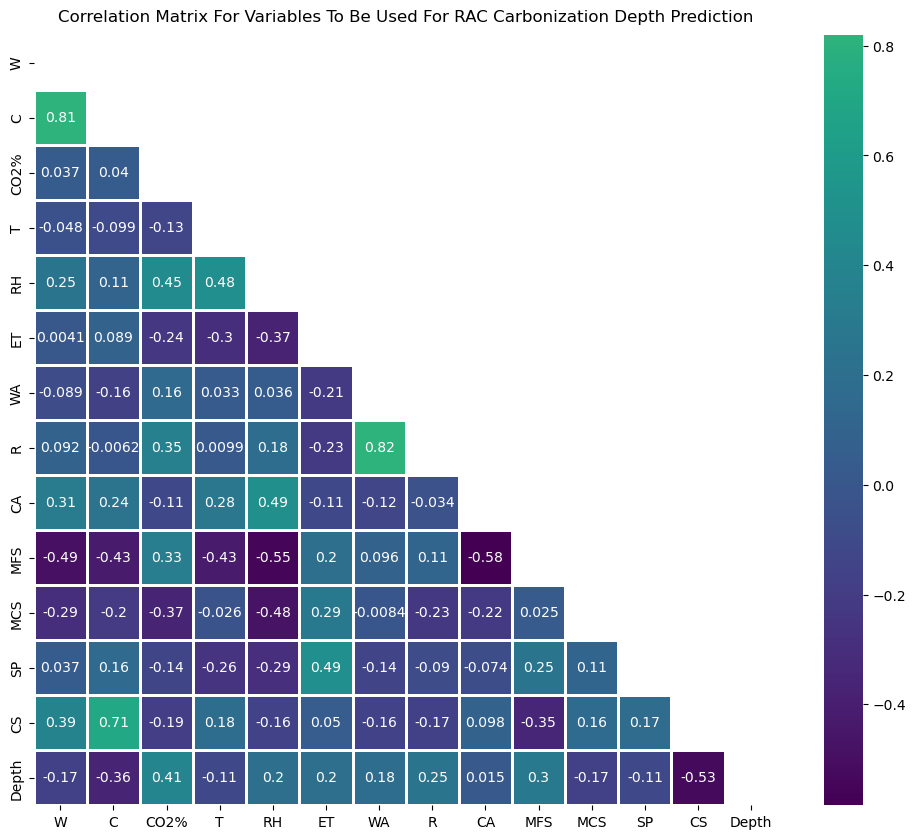

In [23]:
corr = carbonization_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_c.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Carbonization Depth Prediction',pad=10)
plt.show()

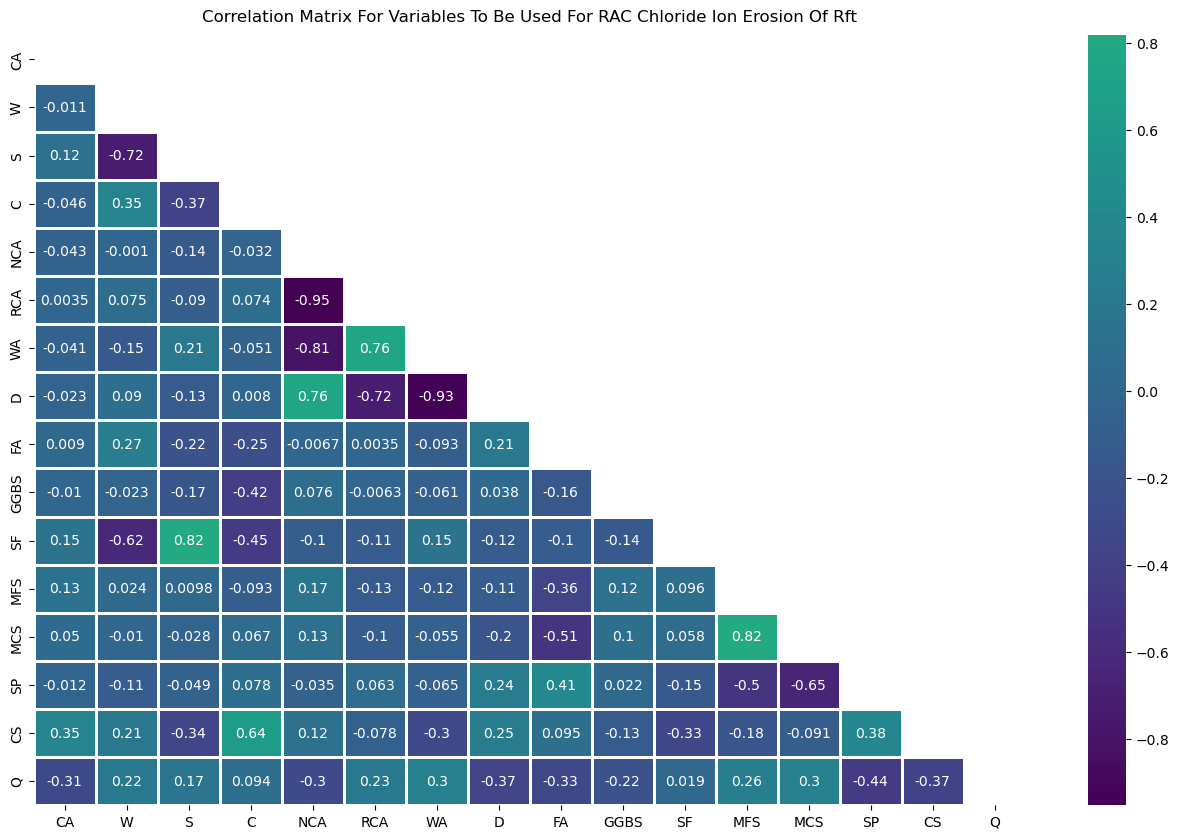

In [24]:
corr = chloride_ion_erosion_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_cl.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (16,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Chloride Ion Erosion Of Rft',pad=10)
plt.show()

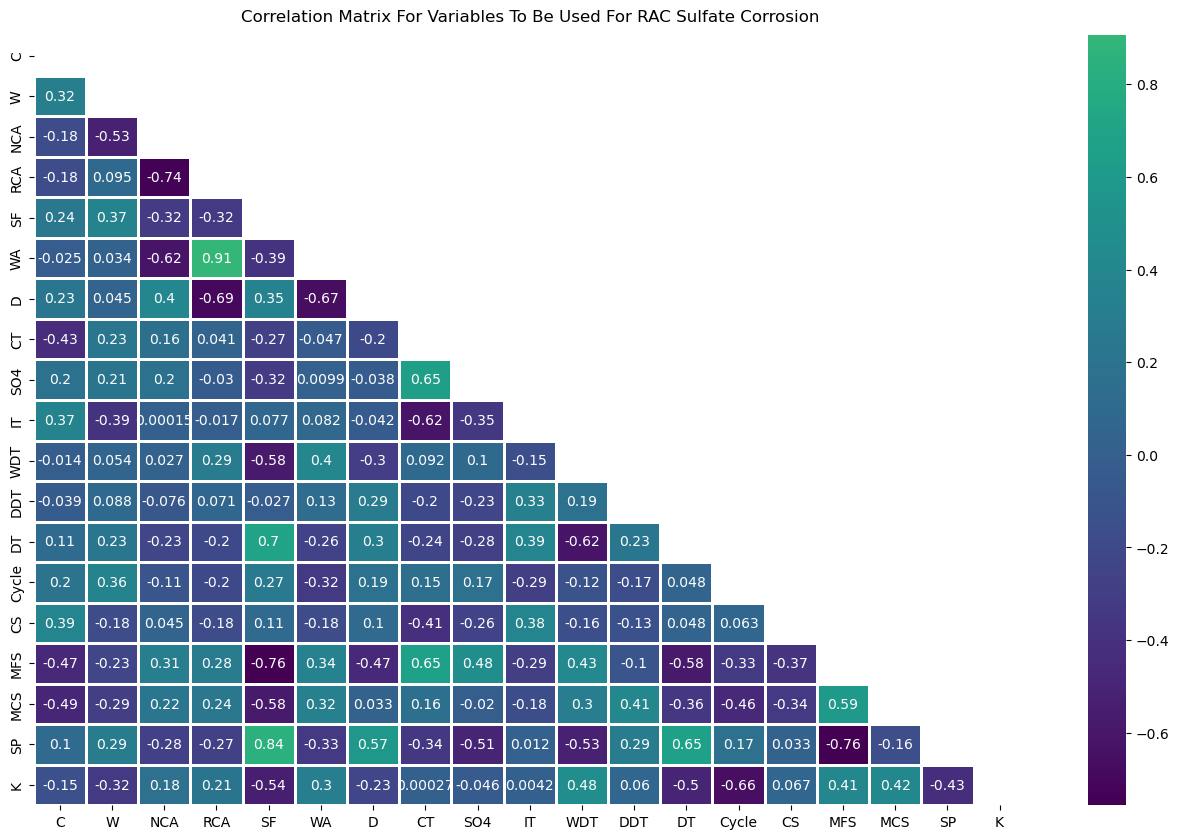

In [25]:
corr = sulfate_corrosion_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_sf.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (16,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Sulfate Corrosion',pad=10)
plt.show()

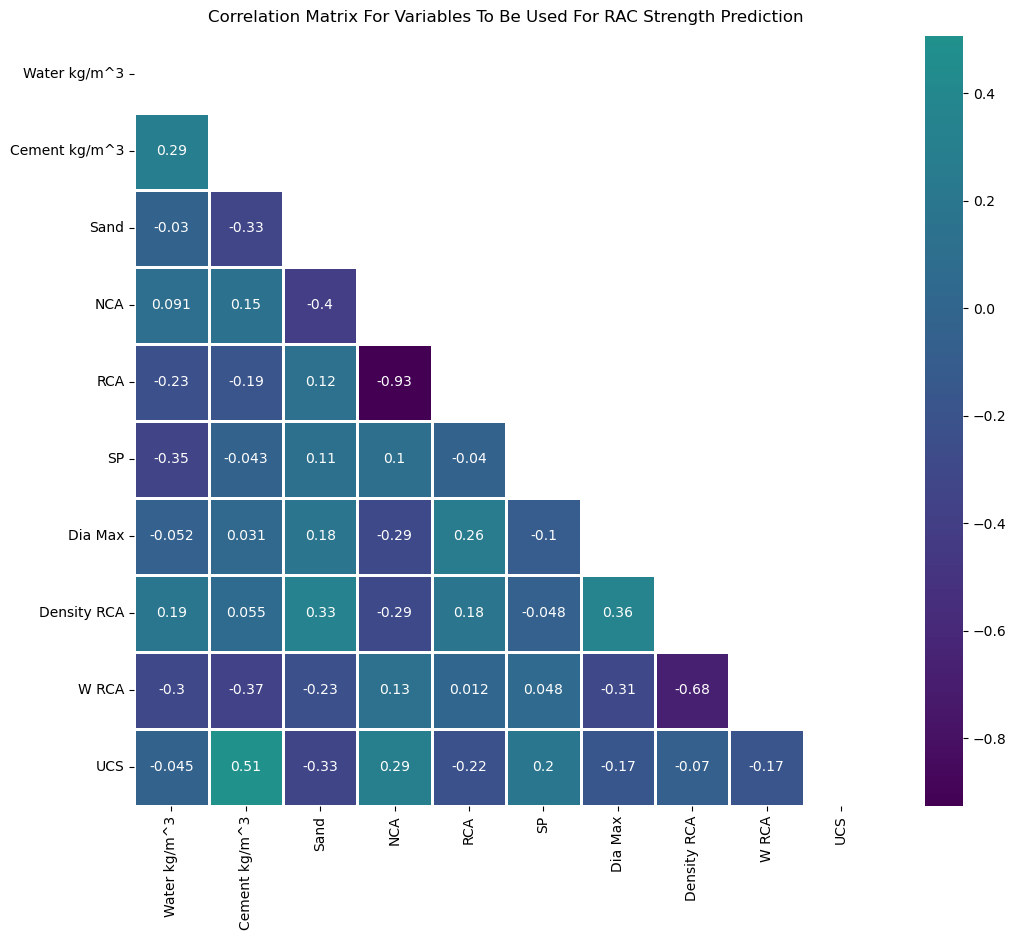

In [26]:
corr = detailed_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_det.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Strength Prediction',pad=10)
plt.show()

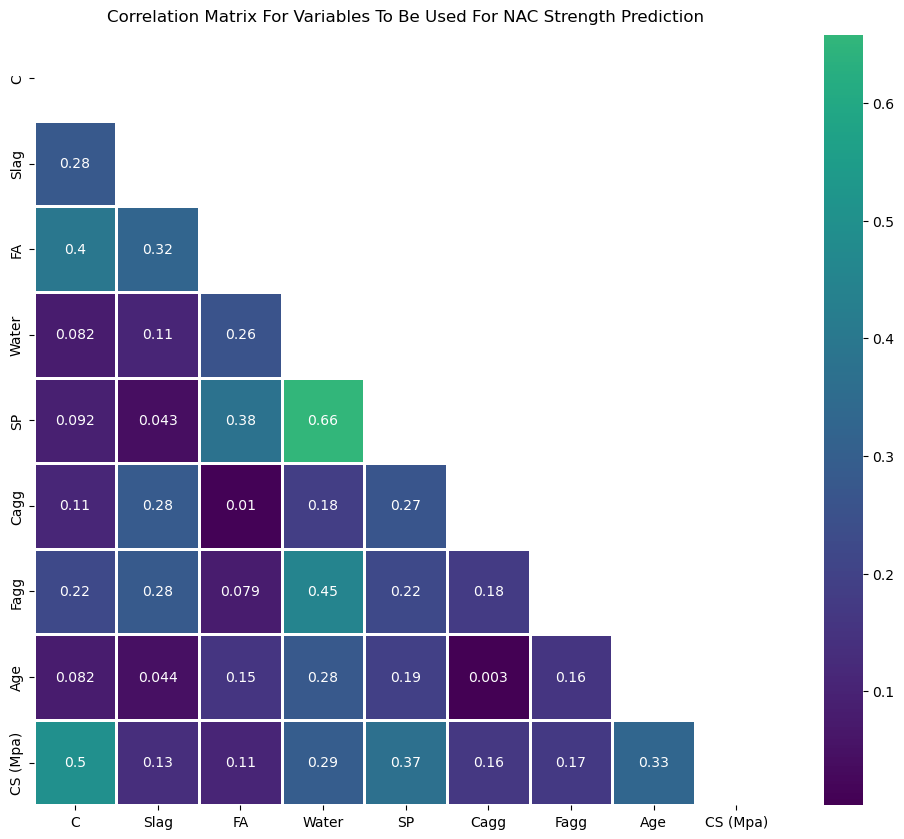

In [27]:
corr = abs(cs.corr()) # correlation matrix
corr.to_csv('./graphs_data/corr_cs.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For NAC Strength Prediction',pad=10)
plt.show()

### Data Wrangling And Preprocessing

In [28]:
sulfate_corrosion_rac.shape

(206, 19)

In [29]:
chloride_ion_erosion_rac.shape

(225, 16)

In [30]:
carbonization_rac.shape

(452, 14)

In [31]:
detailed_rac.shape

(317, 10)

In [32]:
cs.shape

(1030, 9)

In [33]:
carbonization_rac.drop_duplicates(inplace=True)
carbonization_rac.dropna(inplace=True)
carbonization_rac.shape

(451, 14)

In [34]:
chloride_ion_erosion_rac.drop_duplicates(inplace=True)
chloride_ion_erosion_rac.dropna(inplace=True)
chloride_ion_erosion_rac.shape

(225, 16)

In [35]:
sulfate_corrosion_rac.drop_duplicates(inplace=True)
sulfate_corrosion_rac.dropna(inplace=True)
sulfate_corrosion_rac.shape

(134, 19)

In [36]:
#Data Preparation
detailed_rac.duplicated().sum()

54

In [37]:
cs.duplicated().sum()

25

In [38]:
cs.drop_duplicates(inplace=True)
cs.dropna(inplace=True)
cs.shape

(1005, 9)

### Machine Learning Model Imports

In [39]:
#Model Imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

### Data Splitting Into Feature & Target Variables

In [40]:
#Data Splits Into Features & Targets
#X_detailed = detailed_rac.drop(columns=['Compressive Strength (Mpa)','Flexural Strength (Mpa)'])
X_detailed = detailed_rac.drop(columns=['UCS'])

#Y_detailed = detailed_rac[['Compressive Strength (Mpa)']]
Y_detailed = detailed_rac[['UCS']]

X_cs = cs.drop(columns=['CS (Mpa)'])
Y_cs = cs[['CS (Mpa)']]
X_carbonization = carbonization_rac.drop(columns =['Depth'])
Y_carbonization = carbonization_rac[['Depth']]
X_chloride = chloride_ion_erosion_rac.drop(columns =['Q'])
Y_chloride = chloride_ion_erosion_rac[['Q']]
X_sulfate = sulfate_corrosion_rac.drop(columns =['K'])
Y_sulfate = sulfate_corrosion_rac[['K']]


### Data Conversion Into Arrays as Machine Learning Models Take Inputs Only In Form Of Arrays

In [41]:
#Conversion To Arrays For ML Modelling
X_detailed = X_detailed.to_numpy()
Y_detailed = Y_detailed.to_numpy()
X_cs = X_cs.to_numpy()
Y_cs = Y_cs.to_numpy()
X_carbonization = X_carbonization.to_numpy()
Y_carbonization = Y_carbonization.to_numpy()
X_chloride = X_chloride.to_numpy()
Y_chloride = Y_chloride.to_numpy()
X_sulfate = X_sulfate.to_numpy()
Y_sulfate = Y_sulfate.to_numpy()


In [42]:
#Converting Nested Arrays Into Simple List
Y_carbonization = [element for sublist in Y_carbonization for element in sublist]
Y_chloride = [element for sublist in Y_chloride for element in sublist]

In [43]:
#Converting List back into an Array for ML Modelling
Y_carbonization = np.array(Y_carbonization)
Y_chloride = np.array(Y_chloride)

### Data Standardization For Faster Convergence, Reducing Numerical Instabilities, Regularization & Improved Model Performance

In [44]:
#Data Standardization To Remove Numerical Significance
transform_X_detailed = preprocessing.StandardScaler()
transform_X_cs = preprocessing.StandardScaler()
transform_X_carbonization = preprocessing.StandardScaler()
transform_X_chloride = preprocessing.StandardScaler()
transform_X_sulfate = preprocessing.StandardScaler()
#Separate StandardScaler objects are used so that each dataset is scaled according to its own mean and distribution
X_detailed = transform_X_detailed.fit_transform(X_detailed)
X_cs = transform_X_cs.fit_transform(cs)
X_carbonization = transform_X_carbonization.fit_transform(X_carbonization)
X_chloride = transform_X_chloride.fit_transform(X_chloride)
X_sulfate = transform_X_sulfate.fit_transform(X_sulfate)

### Conversion Of Target Variable From 2D Array to 1D Array For Prediction Process

In [45]:
Y_detailed = Y_detailed.ravel()
Y_carbonization.ravel()
Y_chloride.ravel()
Y_sulfate = Y_sulfate.ravel()
Y_cs = Y_cs.ravel()

### Data Pipeline Creation

In [46]:
Y_cs.shape

(1005,)

In [47]:
X_cs.shape

(1005, 9)

In [48]:
#Train-Test-Split
X_train_det, X_test_det, Y_train_det, Y_test_det = train_test_split(X_detailed,Y_detailed,test_size=0.1,random_state=22)
X_train_cs, X_test_cs, Y_train_cs, Y_test_cs = train_test_split(X_cs,Y_cs,test_size=0.1,random_state=22)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_carbonization,Y_carbonization,test_size=0.1,random_state=22)
X_train_cl, X_test_cl, Y_train_cl, Y_test_cl = train_test_split(X_chloride,Y_chloride,test_size=0.1,random_state=22)
X_train_sf, X_test_sf, Y_train_sf, Y_test_sf = train_test_split(X_sulfate,Y_sulfate,test_size=0.1,random_state=22)

In [49]:
X_test_cs.shape

(101, 9)

### Defining Model Functions, Hypertuning Of Parameters To Prevent Overfitting & Cross-Validation For Realistic Accuracy Scoring. These Functions Will Create a Grid Of All Possible Parameters and Select The Best Possible Parameters For Prediction Purposes.

In [50]:
#Support Vector Machine Function Definition
def svm_training(X_train,Y_train):
    parameters = {'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
                  'gamma': [0.1,1,10],
                  'C' :[1,10,100]
                  }
    svm = SVR()
    svm_cv = GridSearchCV(svm,parameters,cv=5)
    svm_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
    print("accuracy :",svm_cv.best_score_)

In [51]:
#Decision Tree Regressor Function Definition
def decision_regressor(X_train,Y_train):
    parameters = {'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [100, 500, 1000],
    'criterion': ['squared_error']}
    dtr = DecisionTreeRegressor()
    dtr_cv = GridSearchCV(dtr,parameters,cv=3)
    dtr_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",dtr_cv.best_params_)
    print("accuracy :",dtr_cv.best_score_)

In [52]:
'''
decision_regressor(X_train_det,Y_train_det)
decision_regressor(X_train_cs,Y_train_cs)
decision_regressor(X_train_c,Y_train_c)
decision_regressor(X_train_cl,Y_train_cl)
decision_regressor(X_train_sf,Y_train_sf)
'''

'\ndecision_regressor(X_train_det,Y_train_det)\ndecision_regressor(X_train_cs,Y_train_cs)\ndecision_regressor(X_train_c,Y_train_c)\ndecision_regressor(X_train_cl,Y_train_cl)\ndecision_regressor(X_train_sf,Y_train_sf)\n'

In [53]:
#Random Forest Regressor Function Definition
def rf_regressor(X_train,Y_train):
    parameters = {'n_estimators': [100, 200,240, 300, 500],
    'max_depth': [3, 5, 7,9],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_samples': [0.5,0.7,0.9],
    'bootstrap': [True, False],
    }
    rfr = RandomForestRegressor()
    rfr_cv = GridSearchCV(rfr,parameters,cv=3)
    rfr_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",rfr_cv.best_params_)
    print("accuracy :",rfr_cv.best_score_)

In [54]:
'''
rf_regressor(X_train_det,Y_train_det)
rf_regressor(X_train_cs,Y_train_cs)
rf_regressor(X_train_c,Y_train_c)
rf_regressor(X_train_cl,Y_train_cl)
rf_regressor(X_train_sf,Y_train_sf)
'''

'\nrf_regressor(X_train_det,Y_train_det)\nrf_regressor(X_train_cs,Y_train_cs)\nrf_regressor(X_train_c,Y_train_c)\nrf_regressor(X_train_cl,Y_train_cl)\nrf_regressor(X_train_sf,Y_train_sf)\n'

In [55]:
#Adaboost Regressor Function Definition
def ada_regressor(X_train,Y_train):
    parameters = {'n_estimators': [50,100,500,1000],
    'learning_rate': [0.01,0.1,1,10],
    'loss': ['linear', 'square', 'exponential']}
    adaR = AdaBoostRegressor()
    adaR_cv = GridSearchCV(adaR,parameters,cv=3)
    adaR_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",adaR_cv.best_params_)
    print("accuracy :",adaR_cv.best_score_)

In [56]:
'''
ada_regressor(X_train_det,Y_train_det)
ada_regressor(X_train_cs,Y_train_cs)
ada_regressor(X_train_c,Y_train_c)
ada_regressor(X_train_cl,Y_train_cl)
ada_regressor(X_train_sf,Y_train_sf)
'''

'\nada_regressor(X_train_det,Y_train_det)\nada_regressor(X_train_cs,Y_train_cs)\nada_regressor(X_train_c,Y_train_c)\nada_regressor(X_train_cl,Y_train_cl)\nada_regressor(X_train_sf,Y_train_sf)\n'

In [57]:
#Gradient Boosted Decision Trees Function Definition
def GBDT(X_train,Y_train):
    parameters = {'n_estimators': [50,100,150,200,231,500],
    'learning_rate': [0.05,0.075,0.1,0.15,0.2,1,10],
    'loss': ['squared_error'],
    'criterion':['friedman_mse'],
    'max_depth':[1,3,4,5],
    'subsample':[0.8,0.9],
    'min_samples_split' :[],
    }
    gbtree = GradientBoostingRegressor()
    gbtree_cv = GridSearchCV(gbtree,parameters,cv=3)
    gbtree_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",gbtree_cv.best_params_)
    print("accuracy :",gbtree_cv.best_score_)

In [58]:
'''
GBDT(X_train_det,Y_train_det)
GBDT(X_train_cs,Y_train_cs)
GBDT(X_train_c,Y_train_c)
GBDT(X_train_cl,Y_train_cl)
GBDT(X_train_sf,Y_train_sf)
'''

'\nGBDT(X_train_det,Y_train_det)\nGBDT(X_train_cs,Y_train_cs)\nGBDT(X_train_c,Y_train_c)\nGBDT(X_train_cl,Y_train_cl)\nGBDT(X_train_sf,Y_train_sf)\n'

In [59]:
#Historical Gradient Boosting Regressor Function Definition
def histR(X_train,Y_train):
    parameters = {
    'max_iter': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1,0.2, 1.0],
    'loss': ['absolute_error', 'squared_error'],
    'min_samples_leaf':[5,10,15,20],
    'max_depth':[1,3,4,5]}
    histR = HistGradientBoostingRegressor()
    histR_cv = GridSearchCV(histR,parameters,cv=3)
    histR_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",histR_cv.best_params_)
    print("accuracy :",histR_cv.best_score_)

In [60]:
'''
histR(X_train_det,Y_train_det)
histR(X_train_cs,Y_train_cs)
histR(X_train_c,Y_train_c)
histR(X_train_cl,Y_train_cl)
histR(X_train_sf,Y_train_sf)
'''

'\nhistR(X_train_det,Y_train_det)\nhistR(X_train_cs,Y_train_cs)\nhistR(X_train_c,Y_train_c)\nhistR(X_train_cl,Y_train_cl)\nhistR(X_train_sf,Y_train_sf)\n'

### Bayes Optimization For Selected XGBoost Model For Predictions

#### Bayes Optimization For RAC Strength Prediction

In [61]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_det, Y_train_det, 
              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_det)
    score = np.sqrt(metrics.mean_squared_error(Y_test_det, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [62]:
#space_eval(space, best_params)

In [63]:
model_opt_det = XGBRegressor(max_depth = 10, 
                         n_estimators = 260, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 1, 
                         subsample = 0.9,
                         colsample_bytree = 0.7000000000000001, 
                         gamma = 0.5, 
                         reg_alpha = 4.0, 
                         reg_lambda = 8.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_det.fit(X_train_det, Y_train_det, 
              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:32.14178	validation_1-rmse:33.68727
[1]	validation_0-rmse:24.01826	validation_1-rmse:25.43059
[2]	validation_0-rmse:18.36169	validation_1-rmse:19.33178
[3]	validation_0-rmse:14.52273	validation_1-rmse:15.32806
[4]	validation_0-rmse:11.94513	validation_1-rmse:12.50188
[5]	validation_0-rmse:9.94591	validation_1-rmse:10.46617
[6]	validation_0-rmse:8.63880	validation_1-rmse:9.26681
[7]	validation_0-rmse:7.61058	validation_1-rmse:8.29531
[8]	validation_0-rmse:6.71324	validation_1-rmse:7.27969
[9]	validation_0-rmse:5.99349	validation_1-rmse:6.48184
[10]	validation_0-rmse:5.48237	validation_1-rmse:5.95102
[11]	validation_0-rmse:5.03353	validation_1-rmse:5.49901
[12]	validation_0-rmse:4.54168	validation_1-rmse:5.17769
[13]	validation_0-rmse:4.13829	validation_1-rmse:4.63691
[14]	validation_0-rmse:3.83670	validation_1-rmse:4.39988
[15]	validation_0-rmse:3.55178	validation_1-rmse:4.14578
[16]	validation_0-rmse:3.31508	validation_1-rmse:3.89523
[17]	validation_0-rmse:3.11495

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7000000000000001, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=260, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
y_pred_1_opt = model_opt_det.predict(X_test_det)

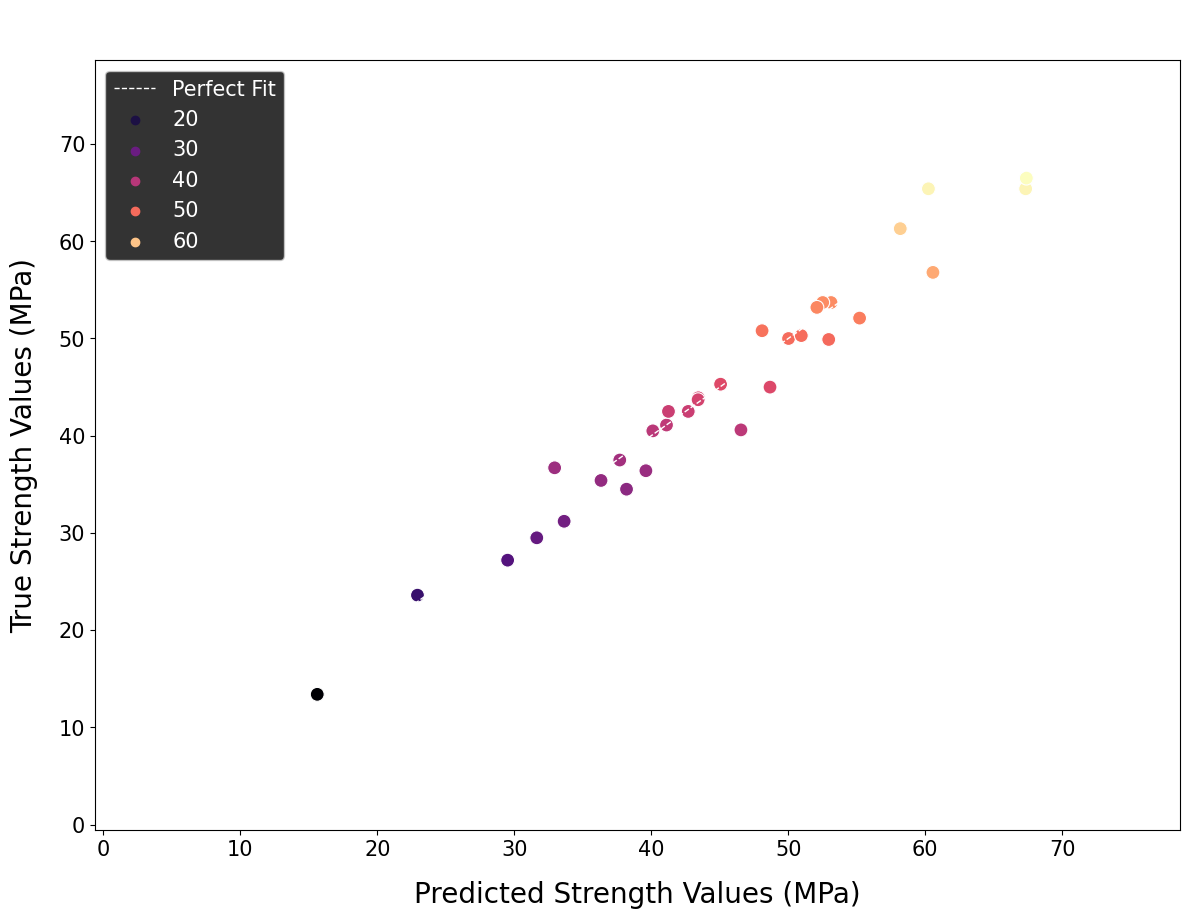

In [65]:
y_line = np.arange(int(Y_test_det.min()) - 10, int(Y_test_det.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_det, s = 100,hue=Y_test_det,palette='magma',markers=True)
plt.xlabel('Predicted Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('True Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Strength Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [66]:
residuals_1_opt = Y_test_det - y_pred_1_opt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


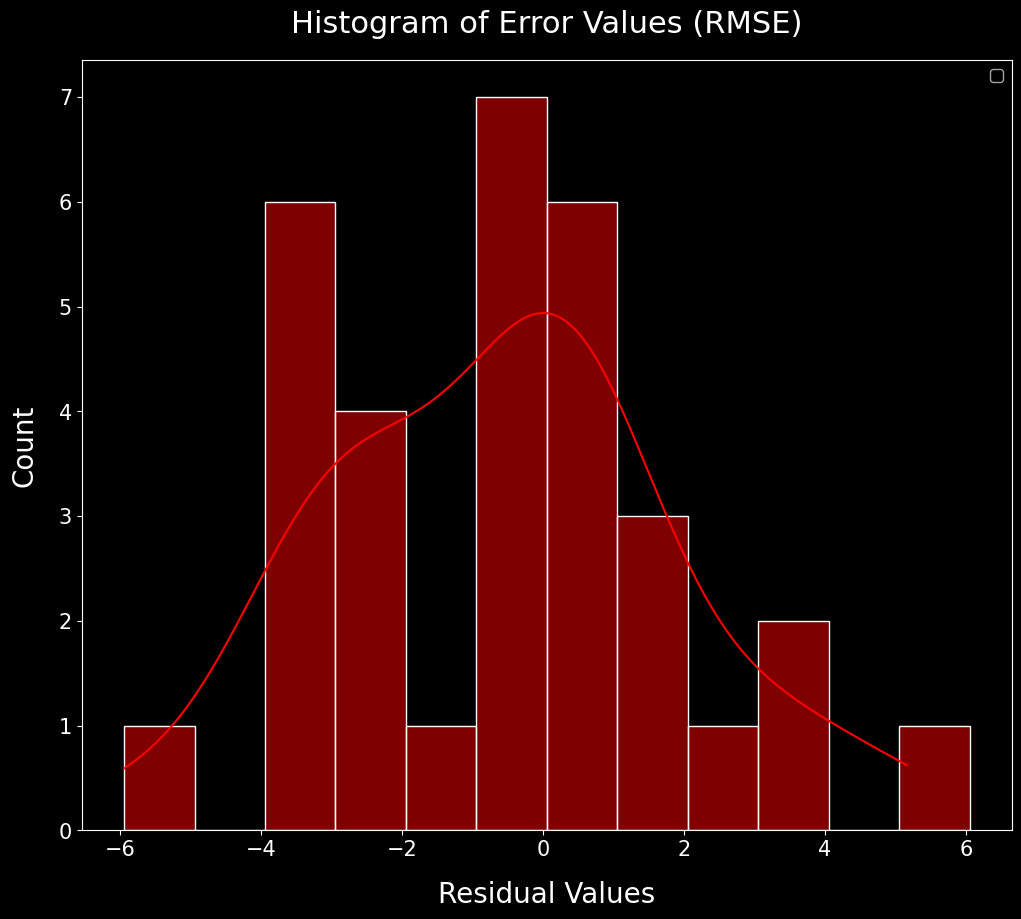

In [67]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 5, alpha = 0.5,kde=True,binwidth=1,color = 'r')
plt.xlabel('Residual Values', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [68]:
from sklearn.metrics import r2_score
yhat=model_opt_det.predict(X_train_det)
r_squared = r2_score(Y_train_det,yhat)
print(r_squared)
yhat=model_opt_det.predict(X_test_det)
r_squared = r2_score(Y_test_det,yhat)
print(r_squared)

0.9904442412981427
0.9586735753743867


#### Bayes Optimization For NAC Compressive Strength Prediction

In [69]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_cs, Y_train_cs, 
              eval_set = [(X_train_cs, Y_train_cs), (X_test_cs, Y_test_cs)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_cs)
    score = np.sqrt(metrics.mean_squared_error(Y_test_cs, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [70]:
#space_eval(space, best_params)

In [71]:
model_opt_cs = XGBRegressor(max_depth = 11, 
                         n_estimators = 250, 
                         learning_rate = 0.1, 
                         min_child_weight = 0, 
                         subsample = 0.7000000000000001,
                         colsample_bytree = 1.0, 
                         gamma = 2.0, 
                         reg_alpha = 0.5, 
                         reg_lambda = 0.0, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_cs.fit(X_train_cs, Y_train_cs, 
              eval_set = [(X_train_cs, Y_train_cs), (X_test_cs, Y_test_cs)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:34.27975	validation_1-rmse:36.76922
[1]	validation_0-rmse:30.85638	validation_1-rmse:33.09413
[2]	validation_0-rmse:27.77587	validation_1-rmse:29.79214
[3]	validation_0-rmse:25.00424	validation_1-rmse:26.81460
[4]	validation_0-rmse:22.50660	validation_1-rmse:24.14586
[5]	validation_0-rmse:20.26236	validation_1-rmse:21.75263
[6]	validation_0-rmse:18.23984	validation_1-rmse:19.60021
[7]	validation_0-rmse:16.42020	validation_1-rmse:17.64723
[8]	validation_0-rmse:14.78355	validation_1-rmse:15.88347
[9]	validation_0-rmse:13.31109	validation_1-rmse:14.32231
[10]	validation_0-rmse:11.98361	validation_1-rmse:12.90345
[11]	validation_0-rmse:10.78992	validation_1-rmse:11.62606
[12]	validation_0-rmse:9.71187	validation_1-rmse:10.47937
[13]	validation_0-rmse:8.74352	validation_1-rmse:9.44628
[14]	validation_0-rmse:7.87266	validation_1-rmse:8.51038
[15]	validation_0-rmse:7.08839	validation_1-rmse:7.67175
[16]	validation_0-rmse:6.38441	validation_1-rmse:6.92014
[17]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
y_pred_1_opt = model_opt_cs.predict(X_test_cs)

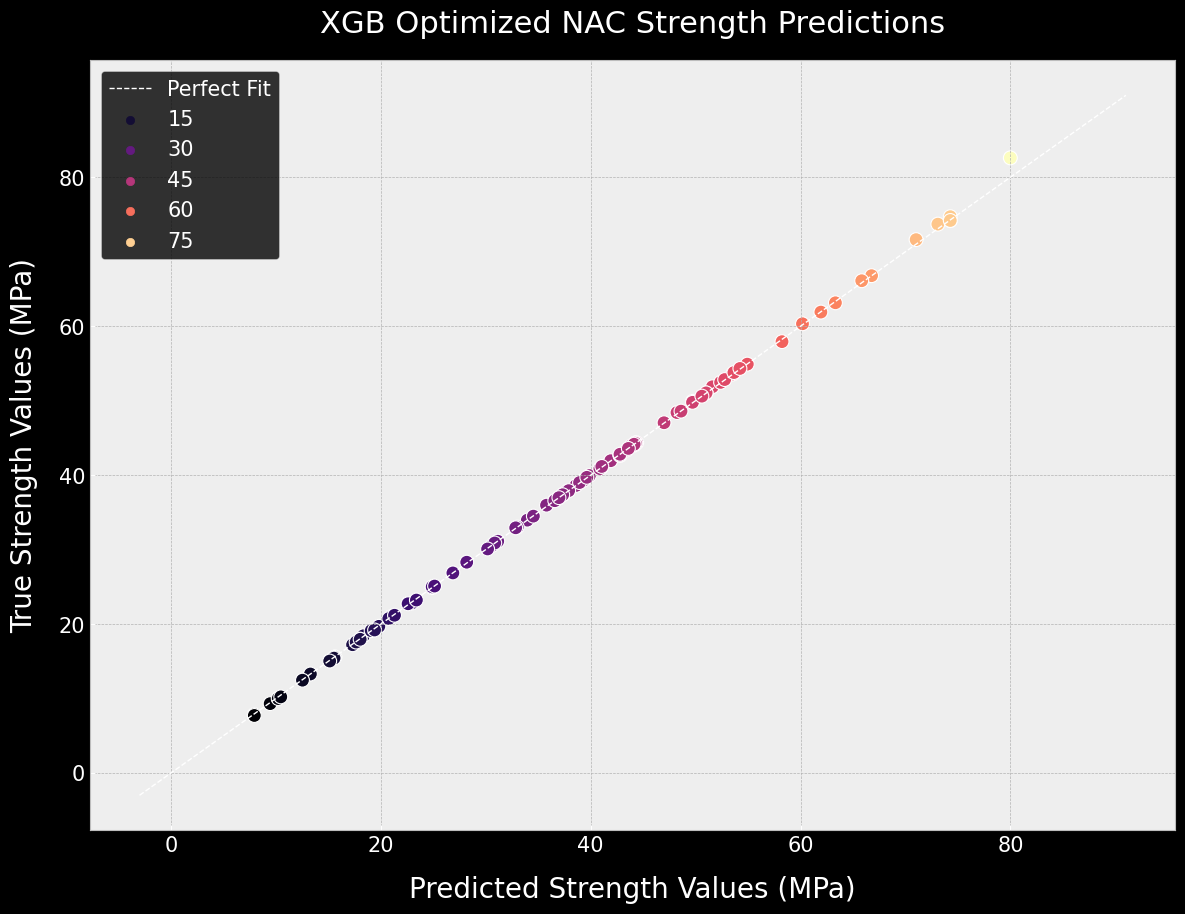

In [73]:
y_line = np.arange(int(Y_test_cs.min()) - 10, int(Y_test_cs.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_cs, s = 100,hue=Y_test_cs,palette='magma',markers=True)
plt.xlabel('Predicted Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('True Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized NAC Strength Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [74]:
residuals_1_opt = Y_test_cs - y_pred_1_opt
residuals_1_opt

array([-2.20352173e-02, -3.10827332e-01,  1.35392761e-02,  2.36003113e-02,
       -5.03616333e-03,  1.55748367e-01,  8.57034302e-02,  5.08659363e-02,
        6.32261658e-02, -1.19328079e-01, -4.88452148e-02, -2.65269470e-02,
        1.99243927e-01,  2.61042938e+00, -1.00540314e-01,  4.57672119e-03,
        2.69793854e-01, -1.89980316e-02,  1.79663086e-01, -7.42427444e-02,
       -1.90060349e-01, -9.69296265e-02,  7.26425171e-02,  6.92439270e-02,
        1.51379395e-02, -4.58314514e-02,  6.92439270e-02,  8.67538452e-03,
        2.68666077e-02,  4.24588013e-02,  5.07374573e-02,  8.63055420e-02,
        6.50463867e-02, -4.71398163e-02, -4.64963150e-02,  2.05990601e-02,
        5.05493164e-02, -6.99682617e-02, -1.25219498e-01,  1.17144394e-01,
       -1.05784149e-01,  6.09234924e-01,  6.17457581e-01, -2.82121277e-02,
       -6.07819366e-02,  1.25201721e-01,  3.21763611e-02,  4.33070374e-01,
        1.25748367e-01, -1.67948990e-01, -1.80922852e-01, -8.43231964e-02,
       -1.21395416e-01, -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


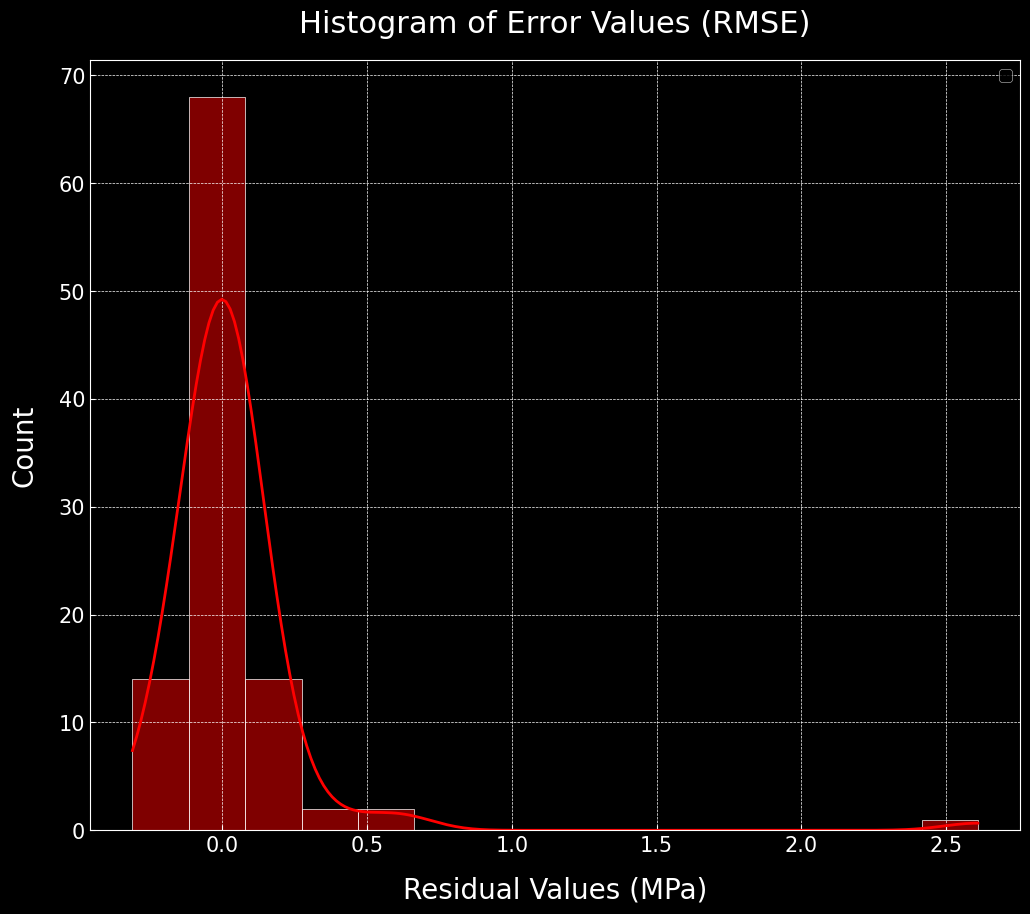

In [75]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [76]:
from sklearn.metrics import r2_score
yhat=model_opt_cs.predict(X_train_cs)
r_squared = r2_score(Y_train_cs,yhat)
print(r_squared)
yhat=model_opt_cs.predict(X_test_cs)
r_squared = r2_score(Y_test_cs,yhat)
print(r_squared)

0.9999493522877259
0.9997071870881837


#### Bayes Optimization For Carbonization Depth

In [77]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_c, Y_train_c, 
              eval_set = [(X_train_c, Y_train_c), (X_test_c, Y_test_c)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_c)
    score = np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [78]:
#space_eval(space, best_params)

In [79]:
model_opt_c = XGBRegressor(max_depth = 13, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 9, 
                         subsample = 0.5,
                         colsample_bytree = 0.5, 
                         gamma = 0.0, 
                         reg_alpha = 1.0, 
                         reg_lambda = 10.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_c.fit(X_train_c, Y_train_c, 
              eval_set = [(X_train_c, Y_train_c), (X_test_c, Y_test_c)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:11.19094	validation_1-rmse:10.21909
[1]	validation_0-rmse:9.53060	validation_1-rmse:8.45135
[2]	validation_0-rmse:8.26980	validation_1-rmse:7.12965
[3]	validation_0-rmse:7.13575	validation_1-rmse:6.01120
[4]	validation_0-rmse:6.45517	validation_1-rmse:5.23022
[5]	validation_0-rmse:5.87023	validation_1-rmse:4.83898
[6]	validation_0-rmse:5.55268	validation_1-rmse:4.45185
[7]	validation_0-rmse:5.28043	validation_1-rmse:4.15694
[8]	validation_0-rmse:4.77296	validation_1-rmse:4.02742
[9]	validation_0-rmse:4.67713	validation_1-rmse:3.99582
[10]	validation_0-rmse:4.53926	validation_1-rmse:3.78781
[11]	validation_0-rmse:4.45648	validation_1-rmse:3.74978
[12]	validation_0-rmse:4.42956	validation_1-rmse:3.69587
[13]	validation_0-rmse:4.32071	validation_1-rmse:3.45815
[14]	validation_0-rmse:3.92039	validation_1-rmse:3.40231
[15]	validation_0-rmse:3.88864	validation_1-rmse:3.41664
[16]	validation_0-rmse:3.61448	validation_1-rmse:3.42581
[17]	validation_0-rmse:3.50858	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
y_pred_1_opt = model_opt_c.predict(X_test_c)

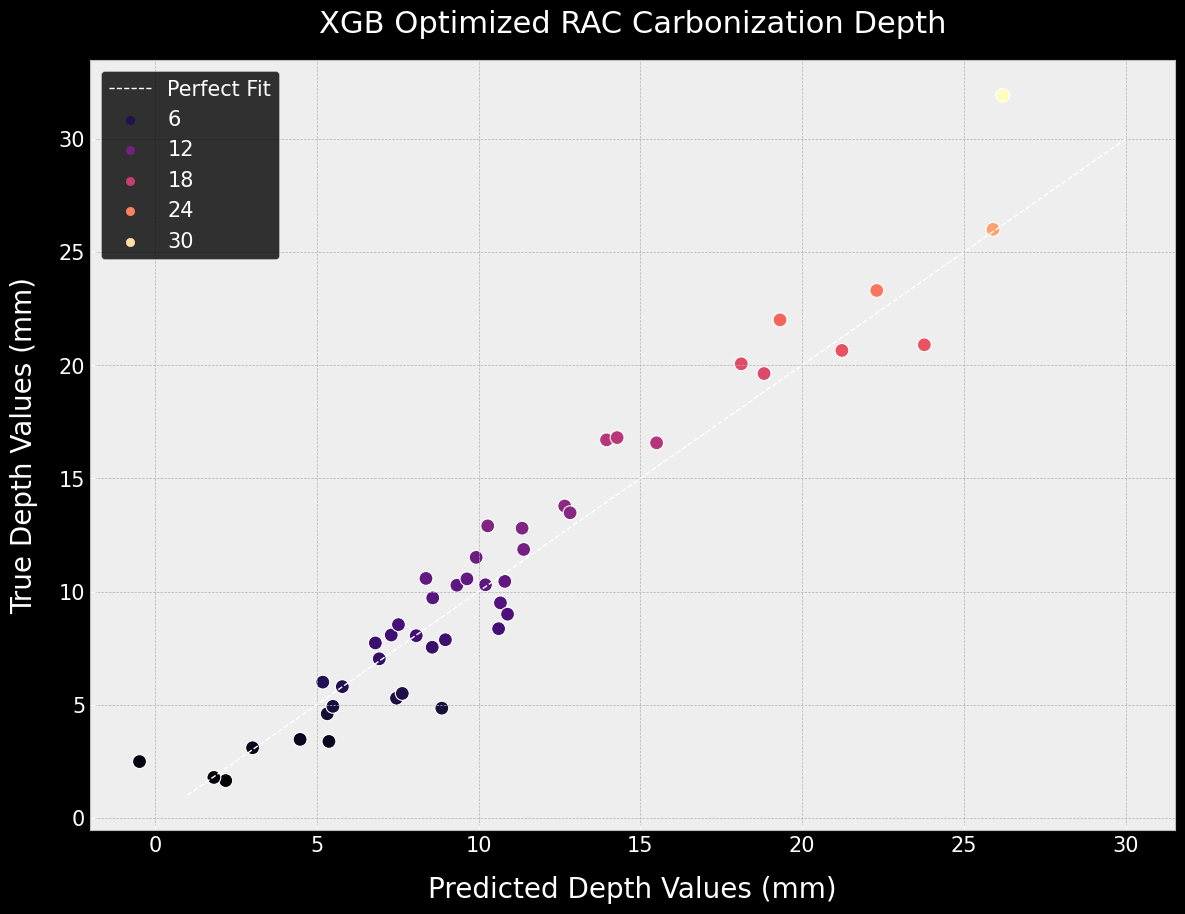

In [81]:
y_line = np.arange(int(Y_test_c.min()), int(Y_test_c.max()))
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_c, s = 100,hue=Y_test_c,palette='magma',markers=True)
plt.xlabel('Predicted Depth Values (mm)', fontsize = 20, labelpad = 15)
plt.ylabel('True Depth Values (mm)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Carbonization Depth', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [82]:
residuals_1_opt = Y_test_c - y_pred_1_opt
residuals_1_opt

array([ 0.08583717,  0.81206036,  2.96483343, -1.01656654,  2.74546642,
        1.45466785, -1.17684078,  0.91792057,  5.72451012,  0.80893982,
       -2.87309227,  0.1045742 ,  0.09766891, -2.17442556,  2.68523598,
        2.51822929, -0.57663689, -0.36102467,  2.61611977, -0.53945146,
       -1.89656162, -0.72413769,  0.7779084 ,  2.20488937,  1.58403946,
       -2.14355707, -0.03260311,  0.00927668,  1.94363266, -4.01559677,
       -0.02469463,  0.94820145,  1.11903313,  0.08134613,  1.01452402,
        0.91821629,  1.13538715, -1.99783337,  0.65163467, -1.02837749,
        0.99772148, -0.57172472, -1.10571278,  1.06970055, -2.26024689,
        0.46615635])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


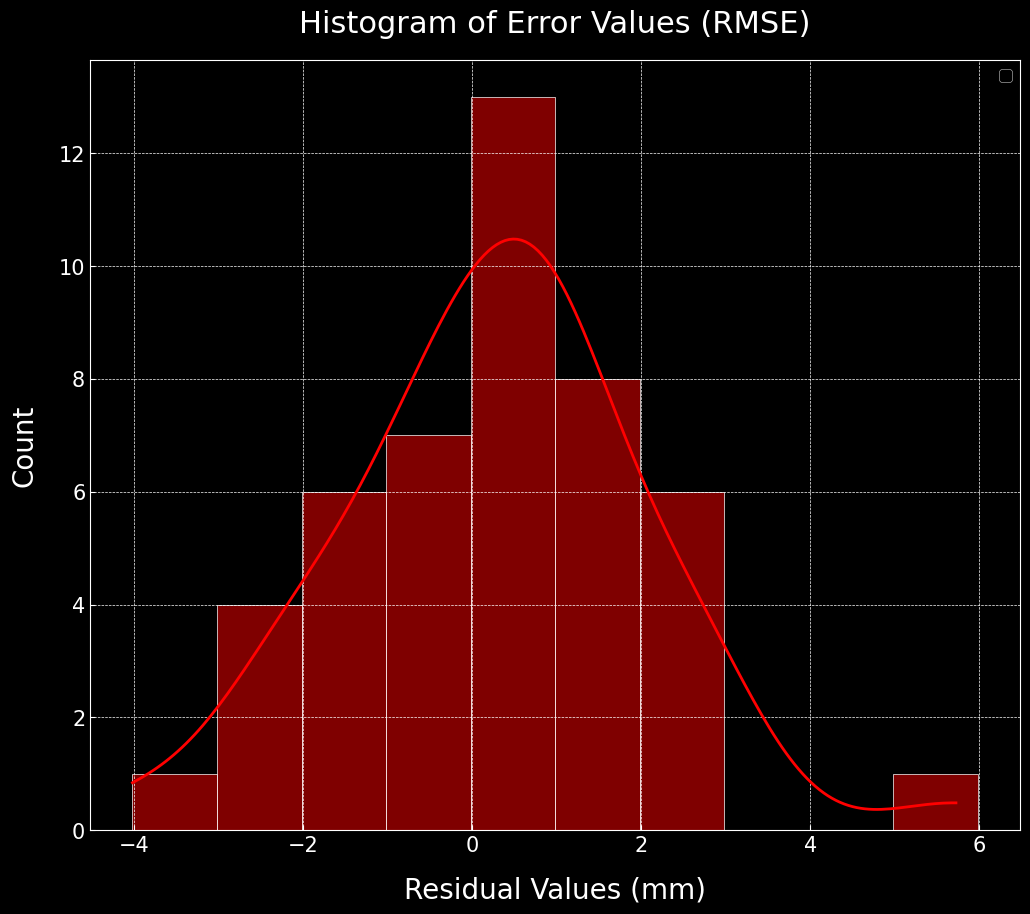

In [83]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 5, alpha = 0.5,kde=True,binwidth=1,color = 'r')
plt.xlabel('Residual Values (mm)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [84]:
from sklearn.metrics import r2_score
yhat=model_opt_c.predict(X_train_c)
r_squared = r2_score(Y_train_c,yhat)
print(r_squared)
yhat=model_opt_c.predict(X_test_c)
r_squared = r2_score(Y_test_c,yhat)
print(r_squared)

0.9732719326896205
0.9316704193603992


#### Bayes Optimization for Sulfate Corrosion

In [85]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_sf, Y_train_sf, 
              eval_set = [(X_train_sf, Y_train_sf), (X_test_sf, Y_test_sf)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_sf)
    score = np.sqrt(metrics.mean_squared_error(Y_test_sf, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [86]:
#space_eval(space, best_params)

In [87]:
model_opt_sf = XGBRegressor(max_depth = 12, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 4, 
                         subsample = 0.8,
                         colsample_bytree = 0.7000000000000001, 
                         gamma = 0.0, 
                         reg_alpha = 0.0, 
                         reg_lambda = 0.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_sf.fit(X_train_sf, Y_train_sf, 
              eval_set = [(X_train_sf, Y_train_sf), (X_test_sf, Y_test_sf)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:0.31080	validation_1-rmse:0.30846
[1]	validation_0-rmse:0.22714	validation_1-rmse:0.23632
[2]	validation_0-rmse:0.16823	validation_1-rmse:0.18801
[3]	validation_0-rmse:0.14011	validation_1-rmse:0.15601
[4]	validation_0-rmse:0.10672	validation_1-rmse:0.13817
[5]	validation_0-rmse:0.08281	validation_1-rmse:0.12586
[6]	validation_0-rmse:0.06543	validation_1-rmse:0.11761
[7]	validation_0-rmse:0.05486	validation_1-rmse:0.11453
[8]	validation_0-rmse:0.04587	validation_1-rmse:0.11038
[9]	validation_0-rmse:0.04076	validation_1-rmse:0.10635
[10]	validation_0-rmse:0.03844	validation_1-rmse:0.10553
[11]	validation_0-rmse:0.03550	validation_1-rmse:0.10324
[12]	validation_0-rmse:0.03413	validation_1-rmse:0.10238
[13]	validation_0-rmse:0.03321	validation_1-rmse:0.09993
[14]	validation_0-rmse:0.03042	validation_1-rmse:0.09838
[15]	validation_0-rmse:0.02836	validation_1-rmse:0.09562
[16]	validation_0-rmse:0.02775	validation_1-rmse:0.09460
[17]	validation_0-rmse:0.02722	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7000000000000001, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
y_pred_1_opt = model_opt_sf.predict(X_test_sf)

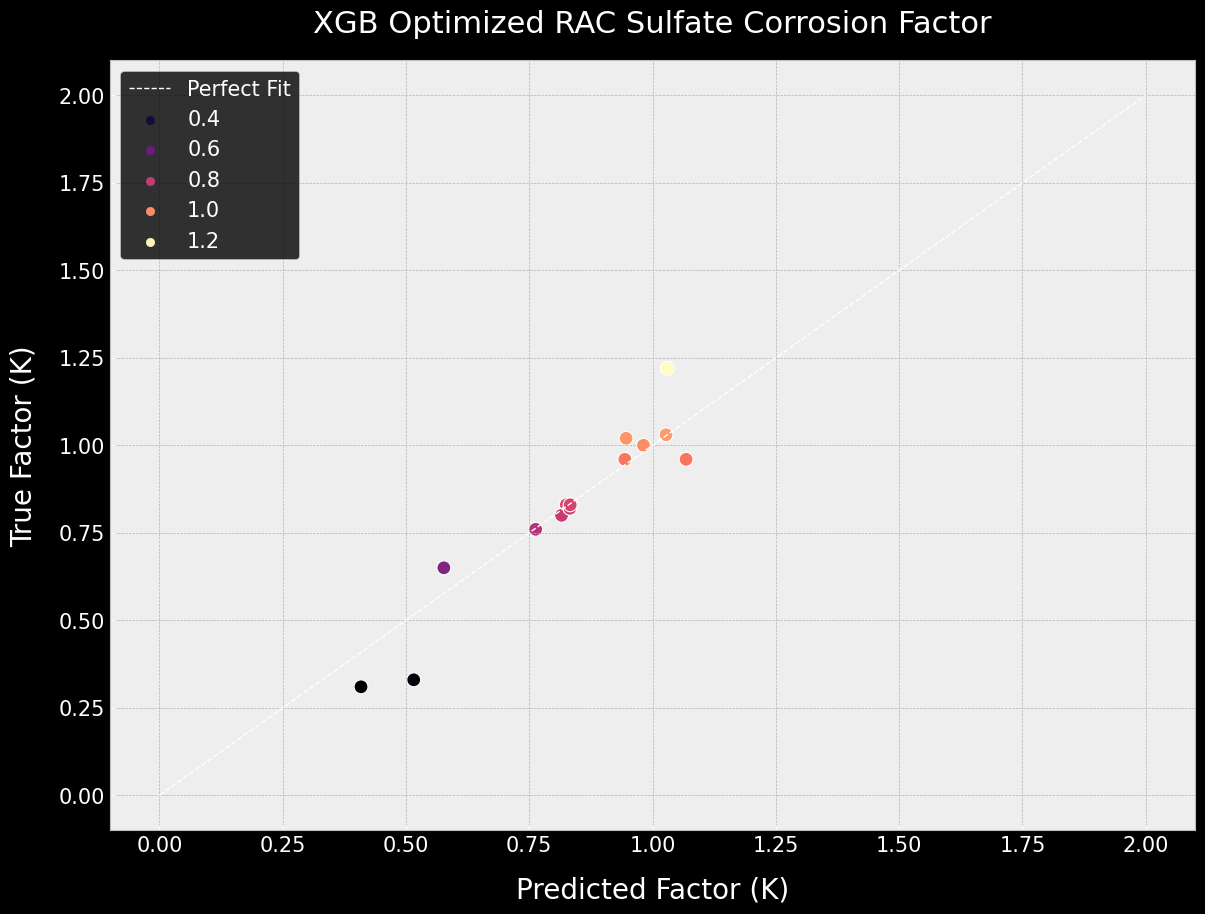

In [89]:
y_line = np.arange(int(Y_test_sf.min()), int(Y_test_sf.max())+1.5 )
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_sf, s = 100,hue=Y_test_sf,palette='magma',markers=True)
plt.xlabel('Predicted Factor (K)', fontsize = 20, labelpad = 15)
plt.ylabel('True Factor (K)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Sulfate Corrosion Factor', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [90]:
residuals_1_opt = Y_test_sf - y_pred_1_opt
residuals_1_opt

array([ 0.00477047,  0.19026587,  0.07372953, -0.00294804, -0.0154757 ,
       -0.18574862,  0.01844478,  0.00266603,  0.01622095,  0.07313391,
       -0.01233398, -0.09885678, -0.10795001, -0.00291286])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


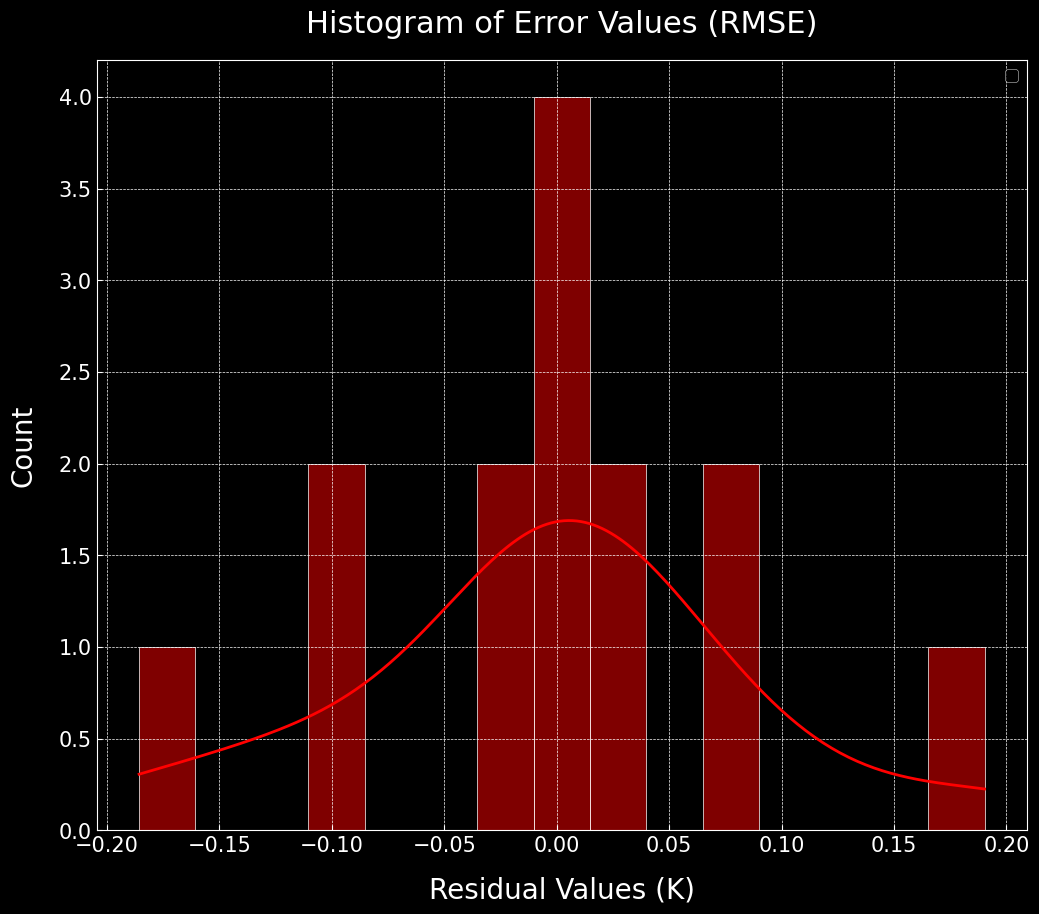

In [91]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (K)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [92]:
from sklearn.metrics import r2_score
yhat=model_opt_sf.predict(X_train_sf)
r_squared = r2_score(Y_train_sf,yhat)
print(r_squared)
yhat=model_opt_sf.predict(X_test_sf)
r_squared = r2_score(Y_test_sf,yhat)
print(r_squared)

0.9947415003055488
0.8775381393119359


#### Bayes Search Optimization for Chloride Ion Erosion

In [93]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_cl, Y_train_cl, 
              eval_set = [(X_train_cl, Y_train_cl), (X_test_cl, Y_test_cl)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_cl)
    score = np.sqrt(metrics.mean_squared_error(Y_test_cl, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [94]:
#space_eval(space, best_params)

In [95]:
model_opt_cl = XGBRegressor(max_depth = 11, 
                         n_estimators = 220, 
                         learning_rate = 0.2, 
                         min_child_weight = 0, 
                         subsample = 0.8,
                         colsample_bytree = 0.7000000000000001, 
                         gamma = 16.0, 
                         reg_alpha = 18.0, 
                         reg_lambda = 12.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_cl.fit(X_train_cl, Y_train_cl, 
              eval_set = [(X_train_cl, Y_train_cl), (X_test_cl, Y_test_cl)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:2898.74705	validation_1-rmse:2402.66924
[1]	validation_0-rmse:2478.55768	validation_1-rmse:2012.40785
[2]	validation_0-rmse:2155.59121	validation_1-rmse:1696.77278
[3]	validation_0-rmse:1877.15980	validation_1-rmse:1441.39662
[4]	validation_0-rmse:1668.68426	validation_1-rmse:1249.12972
[5]	validation_0-rmse:1469.99469	validation_1-rmse:1059.38439
[6]	validation_0-rmse:1323.03448	validation_1-rmse:932.19727
[7]	validation_0-rmse:1205.03525	validation_1-rmse:849.60872
[8]	validation_0-rmse:1102.52672	validation_1-rmse:754.49547
[9]	validation_0-rmse:1012.69604	validation_1-rmse:667.47603
[10]	validation_0-rmse:930.54045	validation_1-rmse:600.29617
[11]	validation_0-rmse:864.02972	validation_1-rmse:549.36893
[12]	validation_0-rmse:808.75124	validation_1-rmse:521.61344
[13]	validation_0-rmse:767.92938	validation_1-rmse:501.19660
[14]	validation_0-rmse:721.56764	validation_1-rmse:493.12230
[15]	validation_0-rmse:688.31544	validation_1-rmse:489.90241
[16]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7000000000000001, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=16.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=220, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [96]:
y_pred_1_opt = model_opt_cl.predict(X_test_cl)

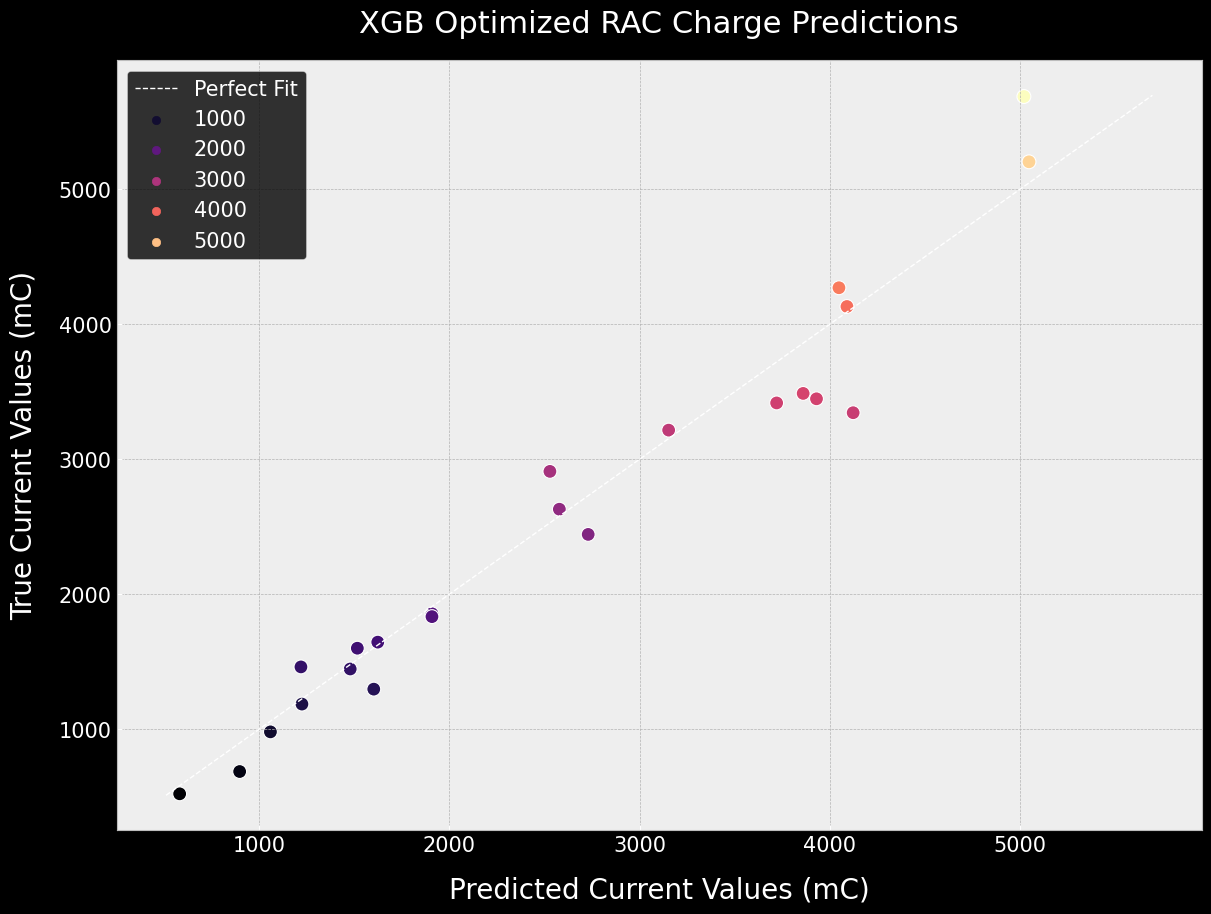

In [97]:
y_line = np.arange(int(Y_test_cl.min()) - 10, int(Y_test_cl.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_cl, s = 100,hue=Y_test_cl,palette='magma',markers=True)
plt.xlabel('Predicted Current Values (mC)', fontsize = 20, labelpad = 15)
plt.ylabel('True Current Values (mC)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Charge Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [98]:
residuals_1_opt = Y_test_cl - y_pred_1_opt
residuals_1_opt

array([ 155.98128906,  -32.625     , -778.40673828, -305.86445312,
        -60.76956299, -372.54248047,   83.86730957,  -53.58642578,
        381.43772461, -482.70263672,   51.51757812,   21.42285156,
        222.20947266,  666.61132812,   41.09887695, -303.66667969,
        -74.58642578,  -79.16162109,  -38.83007812, -286.76689453,
         62.78588867,  241.71806152, -211.04477051])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


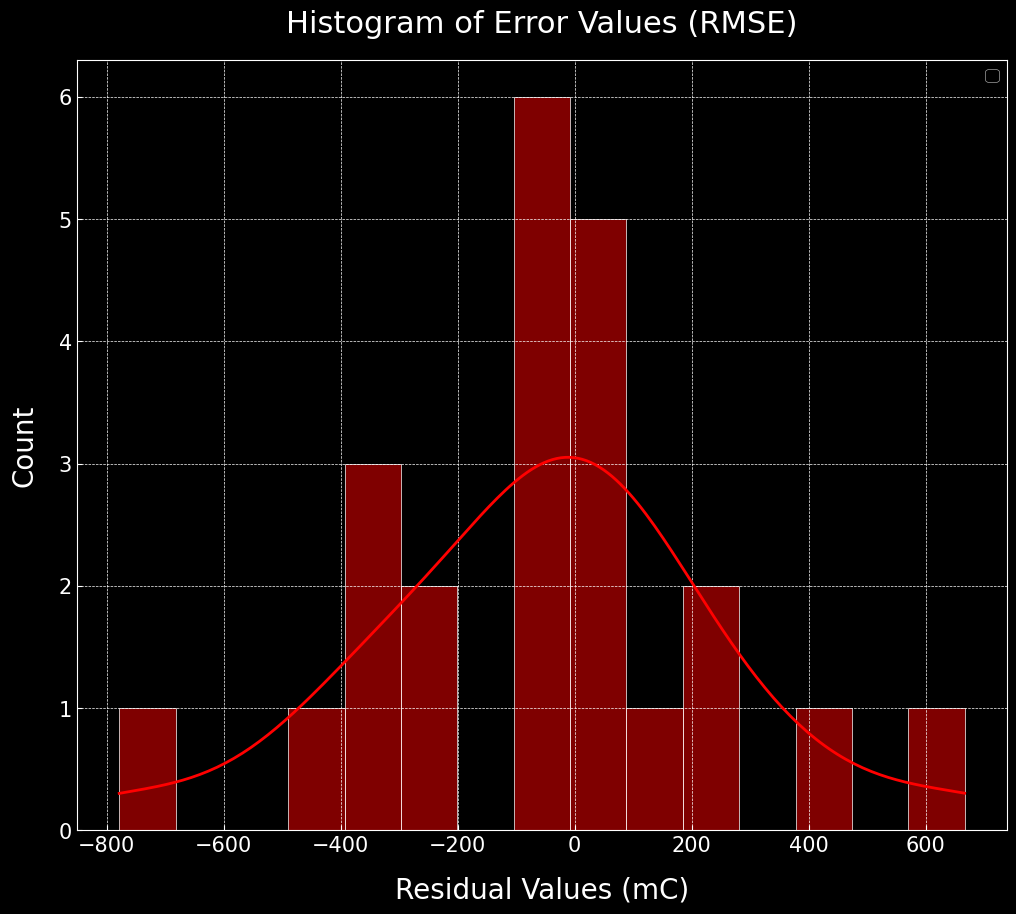

In [99]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (mC)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [100]:
from sklearn.metrics import r2_score
yhat=model_opt_cl.predict(X_train_cl)
r_squared = r2_score(Y_train_cl,yhat)
print(r_squared)
yhat=model_opt_cl.predict(X_test_cl)
r_squared = r2_score(Y_test_cl,yhat)
print(r_squared)

0.9963958441783672
0.9540851277593169


In [101]:
from skopt import BayesSearchCV
#Extreme Gradient Boosting Regressor Function Definition
from skopt.space import Real, Integer
#After Selection of Best Model using Bayes Search Optimizer to reduce overfitting
def bayes_xgb(X_train, Y_train):
   optimization = BayesSearchCV(
               XGBRegressor(),
         {
         'n_estimators' : Integer(50,800),
         'max_depth' :Integer(1,7),
         'learning_rate' : Real(0.01,1),
         'subsample' : Real(0.5,1),
         'colsample_bytree' : Real(0.5,1),
         'reg_alpha' : Real(0,20),
         'min_split_loss' : Integer(0,20),
         'min_child_weight' : Integer(0,20),
         'reg_lambda' : Real(0,20),
         'max_delta_step' : Integer(1,20)
      },
      n_iter=100,
      random_state=111
   )
   np.int = int
   # executes bayesian optimization
   _ = optimization.fit(X_train, Y_train)
   return _

In [102]:
#Extreme Gradient Boosting Regressor Function Definition
n_estimators = np.arange(50,800,50)
max_depth = np.arange(1,7,1)
learning_rate = np.logspace(0.01,1,10)
subsample = np.arange(0,1,0.1)
colsample_bytree = np.arange(0,1,0.1)
reg_alpha = np.arange(0,10,1)
min_split_loss = np.arange(0,10,1)
min_child_weight = np.arange(0,10,1)
reg_lambda = np.arange(0,10,1)
#sampling_method = ['uniform','gradient_based']
max_delta_step = np.arange(1,10,1)
def xgb(X_train,Y_train):
    parameters = {'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'reg_alpha': reg_alpha,
    'min_split_loss':min_split_loss,
    'min_child_weight':min_child_weight,
    'reg_lambda':reg_lambda,
    #'sampling_method':sampling_method,
    #'max_delta_step':max_delta_step,
    'gpu_id': [0]
    }
    xgb = XGBRegressor()
    xgb_cv = GridSearchCV(xgb,parameters,cv=5)
    xgb_cv.fit(X=X_train,y=Y_train)
    return xgb_cv

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
XGB_detailed = XGBRegressor(n_estimators=601,max_depth=6,learning_rate=0.4457817974015126,subsample=0.9788734713427625,colsample_bytree=0.6666273891320196,max_delta_step=3,reg_alpha=5.043999744632456,min_child_weight=1,min_split_loss=7,reg_lambda=6.499667302663611)

In [105]:
XGB_Acc = []
def XGB_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGB_Acc.append(DT_row)

In [106]:
XGB_fit(XGB_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)

In [107]:
#Extreme Gradient Boosting Random Forest Regressor Function Definition
def xgbrf(X_train,Y_train):
    parameters = {'n_estimators': [50, 100, 200,500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'reg_lambda': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3]}
    xgbrf = XGBRFRegressor()
    xgbrf_cv = GridSearchCV(xgbrf,parameters,cv=3)
    xgbrf_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",xgbrf_cv.best_params_)
    print("accuracy :",xgbrf_cv.best_score_)
    

In [108]:
'''
xgbrf(X_train_det,Y_train_det)
xgbrf(X_train_cs,Y_train_cs)
xgbrf(X_train_c,Y_train_c)
xgbrf(X_train_cl,Y_train_cl)
xgbrf(X_train_sf,Y_train_sf)
'''

'\nxgbrf(X_train_det,Y_train_det)\nxgbrf(X_train_cs,Y_train_cs)\nxgbrf(X_train_c,Y_train_c)\nxgbrf(X_train_cl,Y_train_cl)\nxgbrf(X_train_sf,Y_train_sf)\n'

### Hyper Parameter Visualisations

In [109]:
hp_vis = pd.read_csv("Reference Tables.csv")

In [110]:
hp_vis

Algorithm Accuracy Metric  RAC Strength  NAC Strength  \
0    Decision Trees       R Squared        76.000        99.870   
1    Decision Trees             MSE        55.250         0.031   
2    Decision Trees            RMSE         6.600         0.177   
3    Decision Trees             MAE         5.000         0.104   
4     Random Forest       R Squared        83.400        99.870   
5     Random Forest             MSE        42.350         0.071   
6     Random Forest            RMSE         6.506         0.267   
7     Random Forest             MAE         4.465         0.079   
8          AdaBoost       R Squared        70.100        99.900   
9          AdaBoost             MSE        76.930         0.220   
10         AdaBoost            RMSE         8.771         0.469   
11         AdaBoost             MAE         7.029         0.294   
12             GBDT       R Squared        86.100        99.970   
13             GBDT             MSE        35.820         0.050   
14             GBDT            RMSE         5.985         0.224   
15             GBDT             MAE         4.093         0.086   
16  Historical GBDT       R Squared        83.000        99.990   
17  Historical GBDT             MSE        40.976         0.164   
18  Historical GBDT            RMSE         6.401         0.405   
19  Historical GBDT             MAE         4.486         0.140   
20          XGBoost       R Squared        92.100        99.998   
21          XGBoost             MSE        21.212         0.118   
22          XGBoost            RMSE         4.606         0.344   
23          XGBoost             MAE         3.764         0.140   
24       XGBoost RF       R Squared        83.300        99.979   
25       XGBoost RF             MSE        42.550         0.083   
26       XGBoost RF            RMSE         6.523         0.289   
27       XGBoost RF             MAE         4.506         0.084   

    RAC Carbonization  RAC Chloride Ion Erosion  RAC Sulfate Corrosion  
0              76.500                    51.000                 60.000  
1              12.600                 91787.000                  0.010  
2               3.550                  1044.000                  0.100  
3               2.483                   584.000                  0.061  
4              86.000                    76.800                 86.500  
5               7.400                 85718.000                  0.003  
6               2.720                   621.000                  0.057  
7               1.948                   439.000                  0.033  
8              71.600                    68.800                 81.900  
9              14.489                 12575.000                  0.004  
10              3.806                   615.000                  0.063  
11              3.073                   516.128                  0.043  
12             94.500                    86.500                 86.200  
13              3.207                 35718.000                  0.003  
14              1.791                   485.508                  0.058  
15              1.236                   332.121                  0.041  
16             92.900                    86.600                 74.900  
17              4.020                 45127.000                  0.005  
18              2.005                   495.000                  0.074  
19              1.286                   375.782                  0.049  
20             93.900                    86.300                 80.300  
21              3.867                 33844.000                  0.004  
22              1.967                   483.574                  0.066  
23              1.337                   349.100                  0.040  
24             86.400                    75.700                 85.000  
25              7.266                 13130.000                  0.003  
26              2.680                   634.000                  0.058  
27              1.860 

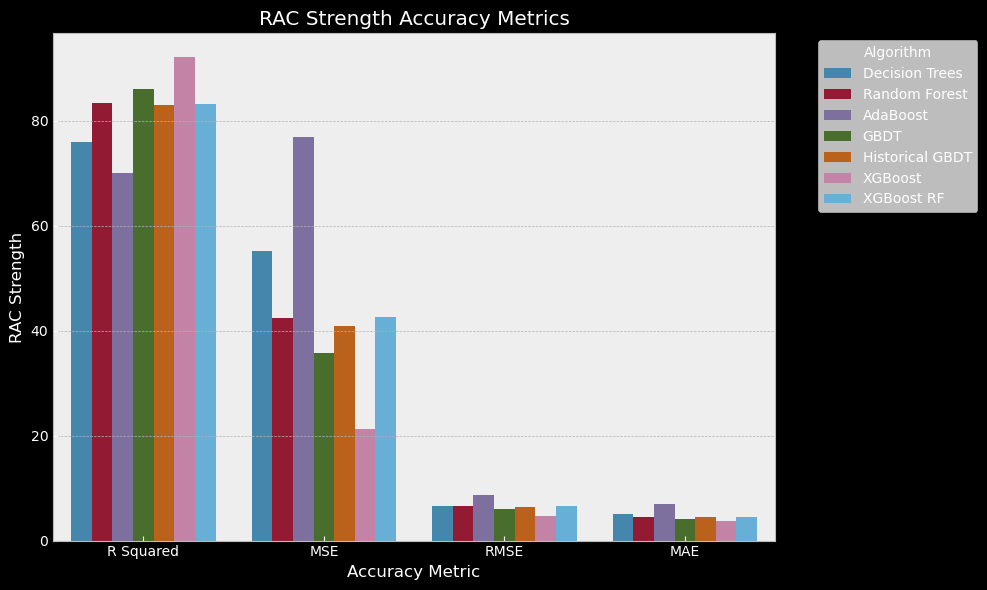

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Strength', hue='Algorithm')
plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Strength')
plt.title('RAC Strength Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

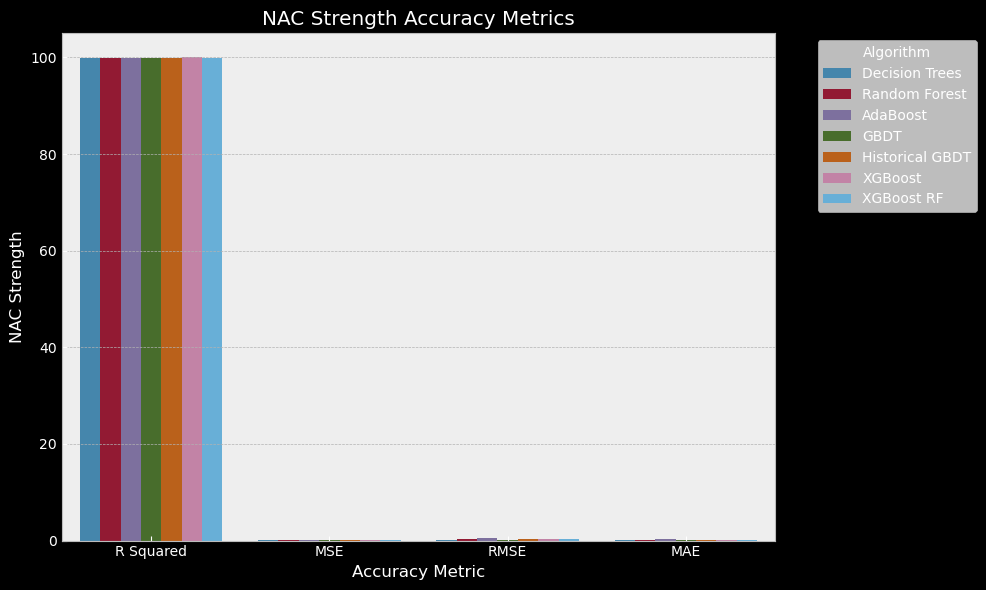

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='NAC Strength', hue='Algorithm')
plt.xlabel('Accuracy Metric')
plt.ylabel('NAC Strength')
plt.title('NAC Strength Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

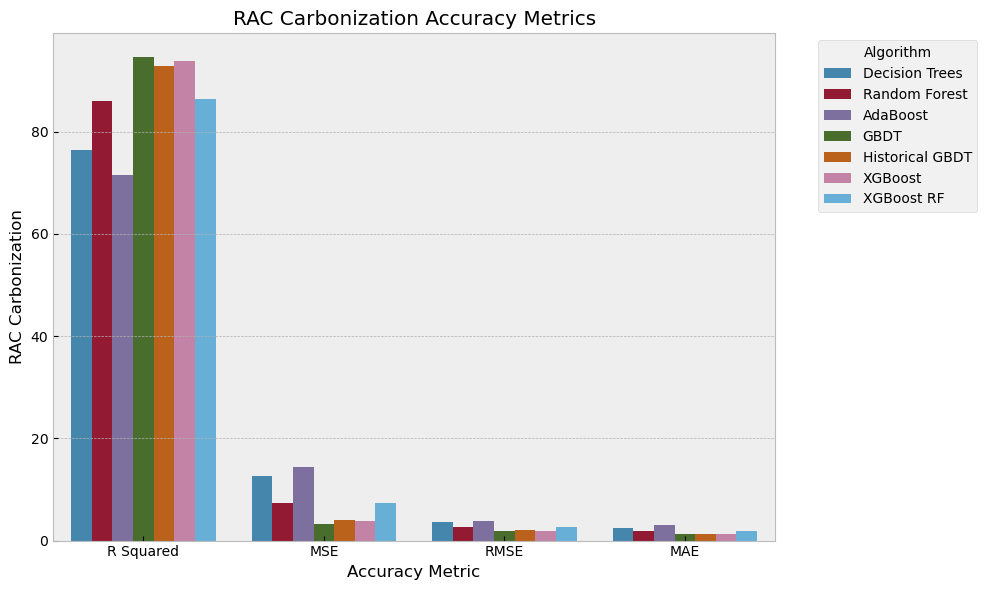

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Carbonization', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Carbonization')
plt.title('RAC Carbonization Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

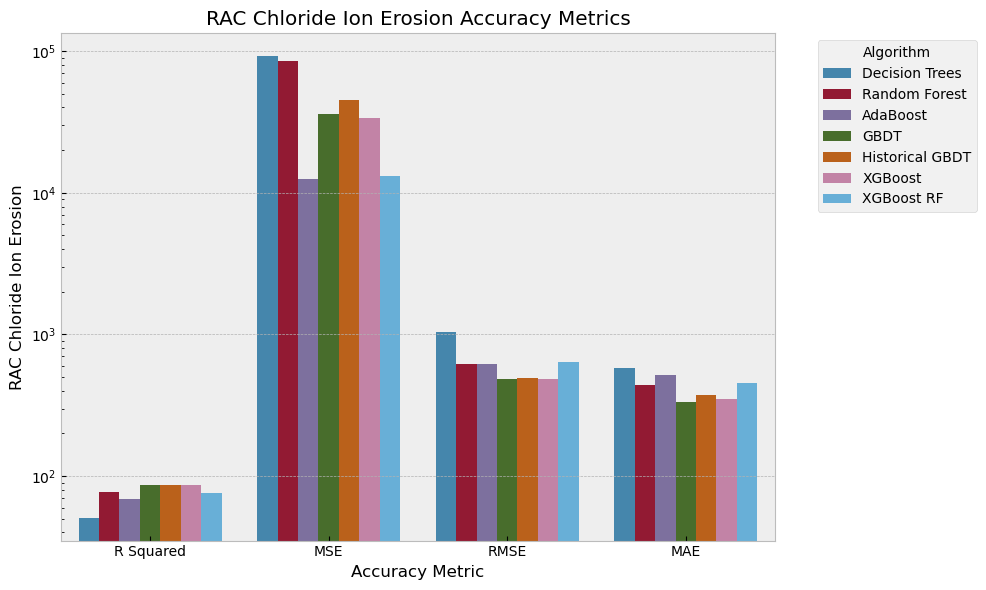

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Chloride Ion Erosion', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Chloride Ion Erosion')
plt.yscale('log') 
plt.title('RAC Chloride Ion Erosion Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

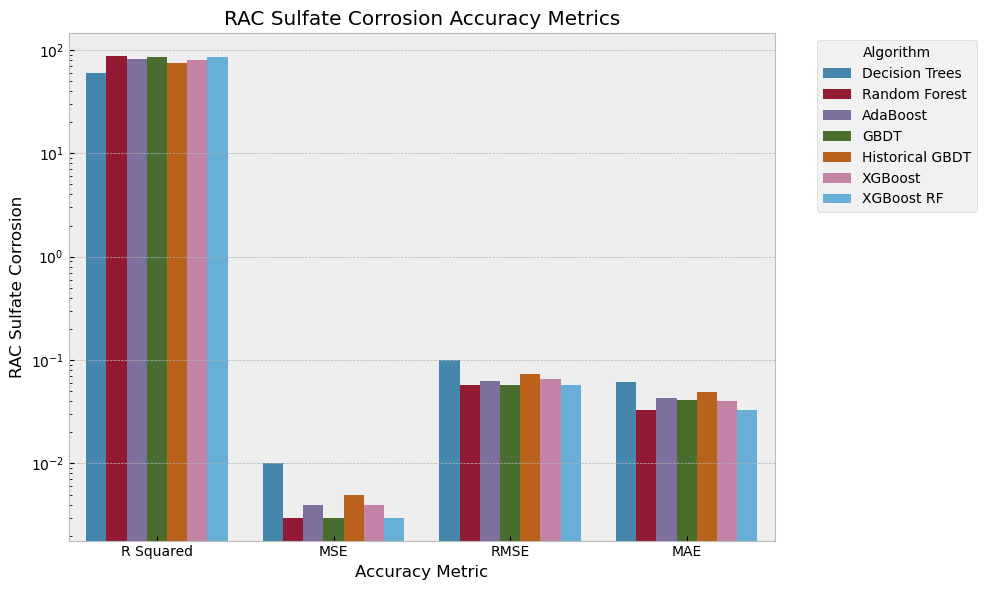

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Sulfate Corrosion', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Sulfate Corrosion')
plt.yscale('log') 
plt.title('RAC Sulfate Corrosion Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Model Training And Fitting Based On Optimized Hyper Parameters

In [ ]:
DT_detailed = DecisionTreeRegressor(criterion='squared_error',max_depth=5,max_features=100,min_samples_leaf=1,min_samples_split=2)
DT_cs = DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_features=500,min_samples_leaf=1,min_samples_split=2)
DT_c= DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_features=1000,min_samples_leaf=2,min_samples_split=2)
DT_cl = DecisionTreeRegressor(criterion='squared_error',max_depth=7,max_features=1000,min_samples_leaf=2,min_samples_split=2)
DT_sf = DecisionTreeRegressor(criterion='squared_error',max_depth=5,max_features=500,min_samples_leaf=1,min_samples_split=5)


In [ ]:
DT_Acc = []
def dt_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    DT_Acc.append(DT_row)



In [ ]:
dt_fit(DT_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
dt_fit(DT_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
dt_fit(DT_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
dt_fit(DT_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
dt_fit(DT_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
DT_Acc

[[0.551, 66.483, 8.154, 6.611],
 [1.0, 0.031, 0.176, 0.111],
 [0.775, 10.488, 3.239, 2.353],
 [0.66, 660358.524, 812.624, 539.447],
 [0.788, 0.013, 0.113, 0.084]]

In [ ]:
RF_detailed = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
RF_cs = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
RF_c= RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
RF_cl = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.7,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
RF_sf = RandomForestRegressor(bootstrap=True,max_depth=7,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)

In [ ]:
RF_Acc = []
def rf_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    RF_Acc.append(DT_row)

In [ ]:
rf_fit(RF_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
rf_fit(RF_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
rf_fit(RF_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
rf_fit(RF_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
rf_fit(RF_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
RF_Acc

[[0.899, 15.0, 3.873, 3.249],
 [1.0, 0.096, 0.31, 0.087],
 [0.848, 7.072, 2.659, 1.822],
 [0.858, 275003.747, 524.408, 445.719],
 [0.839, 0.01, 0.099, 0.07]]

In [ ]:
ada_detailed = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=50)
ada_cs = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=500)
ada_c= AdaBoostRegressor(learning_rate=0.1,loss='square',n_estimators=500)
ada_cl = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=1000)
ada_sf = AdaBoostRegressor(learning_rate=0.01,loss='square',n_estimators=100)

In [ ]:
ada_Acc = []
def ada_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    ada_Acc.append(DT_row)

In [ ]:
ada_fit(ada_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
ada_fit(ada_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
ada_fit(ada_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
ada_fit(ada_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
ada_fit(ada_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
ada_Acc

[[0.798, 29.971, 5.475, 4.674],
 [0.999, 0.324, 0.57, 0.396],
 [0.679, 14.934, 3.864, 3.178],
 [0.788, 411428.657, 641.427, 540.594],
 [0.791, 0.013, 0.112, 0.088]]

In [ ]:
GBDT_detailed = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.075,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.9)
GBDT_cs = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.15,loss='squared_error',max_depth=5,n_estimators=100,subsample=0.8)
GBDT_c= GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.15,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.8)
GBDT_cl = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.8)
GBDT_sf = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2,loss='squared_error',max_depth=3,n_estimators=50,subsample=0.9)

In [ ]:
GBDT_Acc = []
def GBDT_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    GBDT_Acc.append(DT_row)

In [ ]:
GBDT_fit(GBDT_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
GBDT_fit(GBDT_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
GBDT_fit(GBDT_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
GBDT_fit(GBDT_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
GBDT_fit(GBDT_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
GBDT_Acc

[[0.937, 9.301, 3.05, 2.4],
 [1.0, 0.026, 0.161, 0.082],
 [0.938, 2.907, 1.705, 1.3],
 [0.961, 75320.76, 274.446, 181.429],
 [0.867, 0.008, 0.09, 0.062]]

In [ ]:
histR_detailed = HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=4,max_iter=200,min_samples_leaf=5)
histR_cs = HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=5,max_iter=100,min_samples_leaf=5)
histR_c= HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=3,max_iter=500,min_samples_leaf=5)
histR_cl = HistGradientBoostingRegressor(learning_rate=0.2,loss='squared_error',max_depth=3,max_iter=200,min_samples_leaf=5)
histR_sf = HistGradientBoostingRegressor(learning_rate=0.2,loss='squared_error',max_depth=4,max_iter=500,min_samples_leaf=10)

In [ ]:
histR_Acc = []
def histR_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    histR_Acc.append(DT_row)

In [ ]:
histR_fit(histR_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
histR_fit(histR_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
histR_fit(histR_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
histR_fit(histR_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
histR_fit(histR_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
histR_Acc

[[0.931, 10.267, 3.204, 2.362],
 [0.999, 0.178, 0.421, 0.154],
 [0.949, 2.374, 1.541, 1.143],
 [0.966, 65795.204, 256.506, 199.023],
 [0.897, 0.006, 0.079, 0.055]]

In [ ]:
XGB_detailed = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.1,subsample=0.9,colsample_bytree=0.8,gamma=0.5,reg_alpha=0.3)
XGB_cs = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1,subsample=1,colsample_bytree=1,gamma=0,reg_alpha=0.1)
XGB_c= XGBRegressor(n_estimators=200,max_depth=3,learning_rate=0.2,subsample=0.9,colsample_bytree=1,gamma=0.1,reg_alpha=0.3)
XGB_cl = XGBRegressor(n_estimators=207,max_depth=3,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,gamma=0,reg_alpha=0)
XGB_sf = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.2,subsample=0.8,colsample_bytree=1,gamma=0,reg_alpha=0.1)

In [ ]:
XGB_Acc = []
def XGB_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGB_Acc.append(DT_row)

In [ ]:
XGB_fit(XGB_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
XGB_fit(XGB_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
XGB_fit(XGB_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
XGB_fit(XGB_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
XGB_fit(XGB_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
XGB_Acc

[[0.942, 8.666, 2.944, 2.103],
 [1.0, 0.057, 0.239, 0.134],
 [0.948, 2.428, 1.558, 1.154],
 [0.961, 75325.804, 274.455, 223.956],
 [0.884, 0.007, 0.084, 0.057]]

In [ ]:
XGBRF_detailed = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)
XGBRF_cs = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)
XGBRF_c= XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=100,subsample=1,reg_lambda=0,reg_alpha=0.1)
XGBRF_cl = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=500,subsample=0.8,reg_lambda=0,reg_alpha=0.3)
XGBRF_sf = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)

In [ ]:
XGBRF_Acc = []
def XGBRF_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGBRF_Acc.append(DT_row)

In [ ]:
XGBRF_fit(RF_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
XGBRF_fit(RF_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
XGBRF_fit(RF_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
XGBRF_fit(RF_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
XGBRF_fit(RF_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [ ]:
XGBRF_Acc

[[0.887, 16.707, 4.087, 3.362],
 [1.0, 0.094, 0.307, 0.09],
 [0.848, 7.062, 2.658, 1.942],
 [0.876, 239941.087, 489.838, 411.515],
 [0.84, 0.01, 0.099, 0.069]]

### Residual Analysis Based On Best Model (According to Accuracy Metrics)

In [ ]:
yhat=model_opt_det.predict(X_train_det)
r_squared = r2_score(Y_train_det,yhat)
r_squared

0.9955170178994596

In [115]:
yhat =model_opt_det.predict(X_test_det)
r_squared = r2_score(Y_test_det, yhat)
r_squared

0.9586735753743867

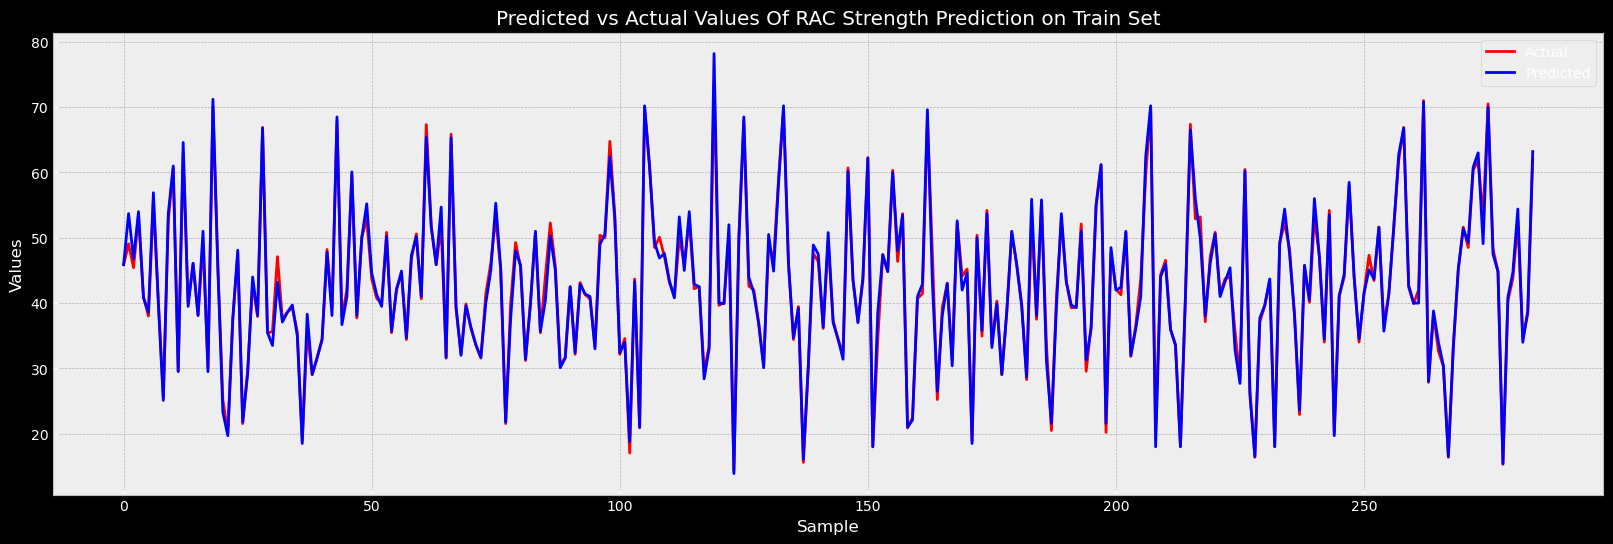

In [114]:
detailed_predicted = model_opt_det.predict(X_train_det)
plt.figure(figsize=(20, 6))
plt.plot(detailed_predicted, color='red', label='Actual')
plt.plot(Y_train_det, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Strength Prediction on Train Set')
plt.legend()
plt.show()

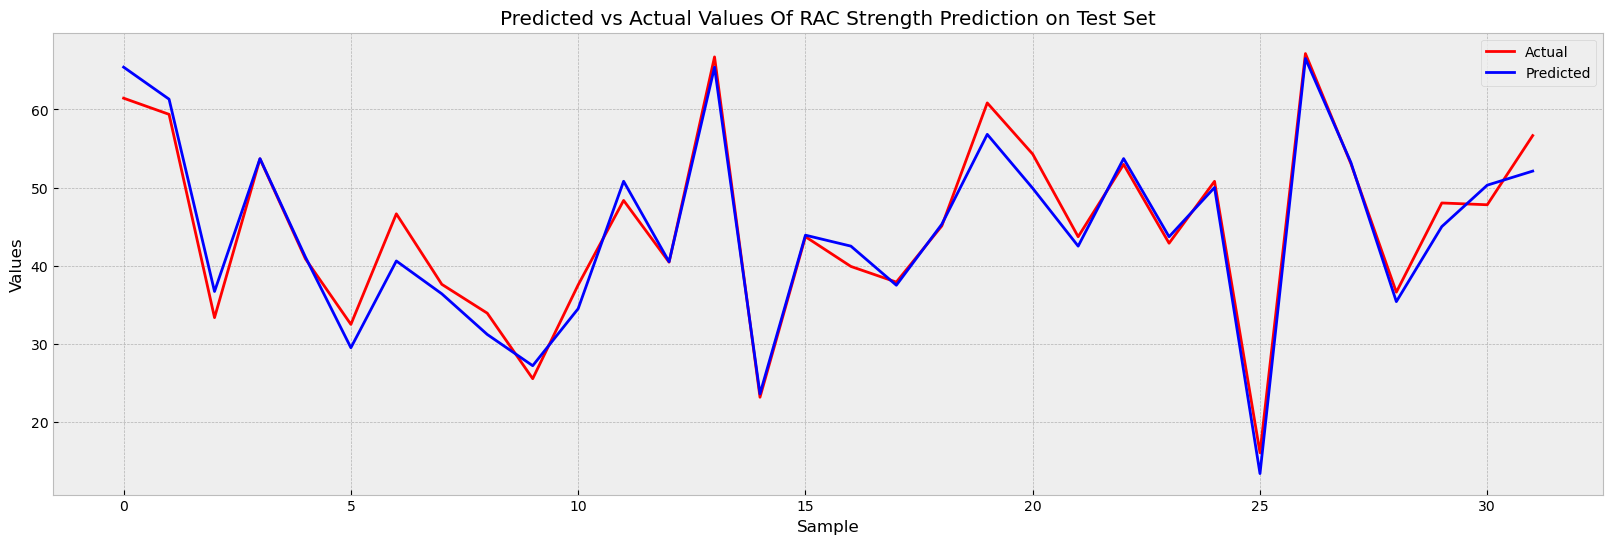

In [ ]:
detailed_predicted = model_opt_det.predict(X_test_det)
plt.figure(figsize=(20, 6))
plt.plot(detailed_predicted, color='red', label='Actual')
plt.plot(Y_test_det, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Strength Prediction on Test Set')
plt.legend()
plt.show()

In [ ]:
yhat =model_opt_cs.predict(X_test_cs)
r_squared = r2_score(Y_test_cs, yhat)
r_squared

0.9997071870881837

In [ ]:
cs_predicted = model_opt_cs.predict(X_test_cs)

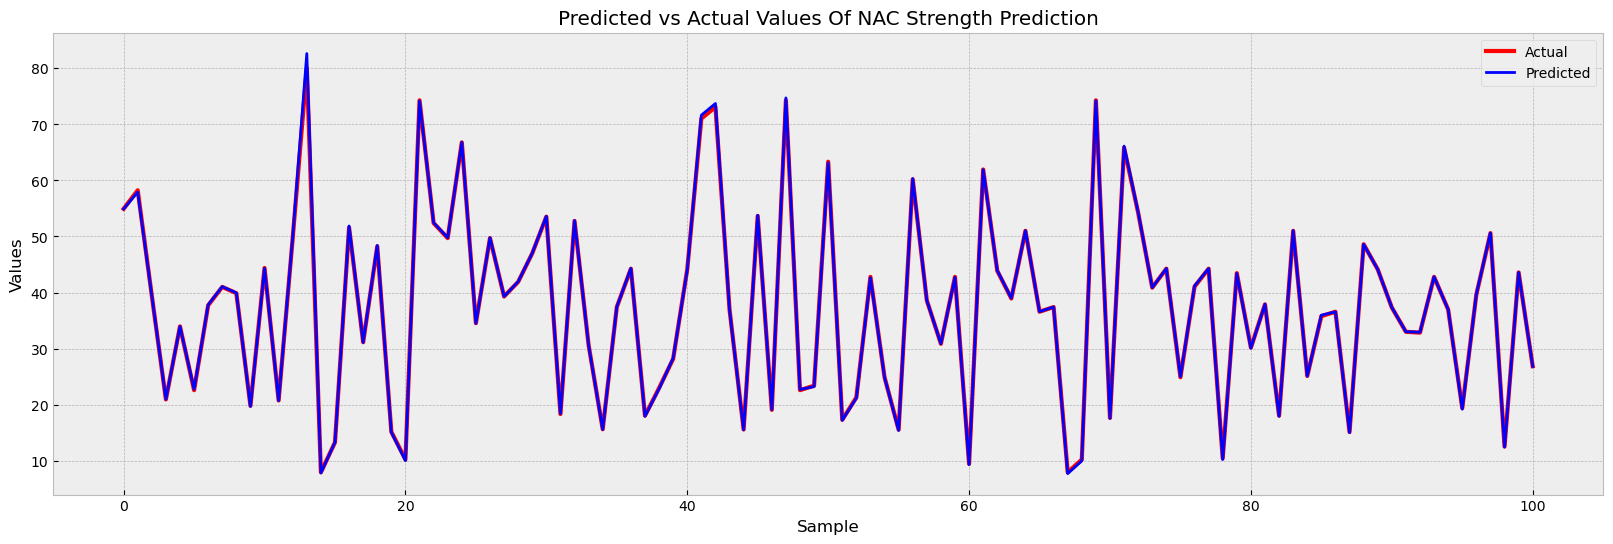

In [ ]:

plt.figure(figsize=(20, 6))
plt.plot(cs_predicted, color='red', label='Actual',linewidth=3)
plt.plot(Y_test_cs, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of NAC Strength Prediction')
plt.legend()
plt.show()

In [ ]:
yhat =model_opt_c.predict(X_test_c)
r_squared = r2_score(Y_test_c, yhat)
r_squared

0.9316704193603992

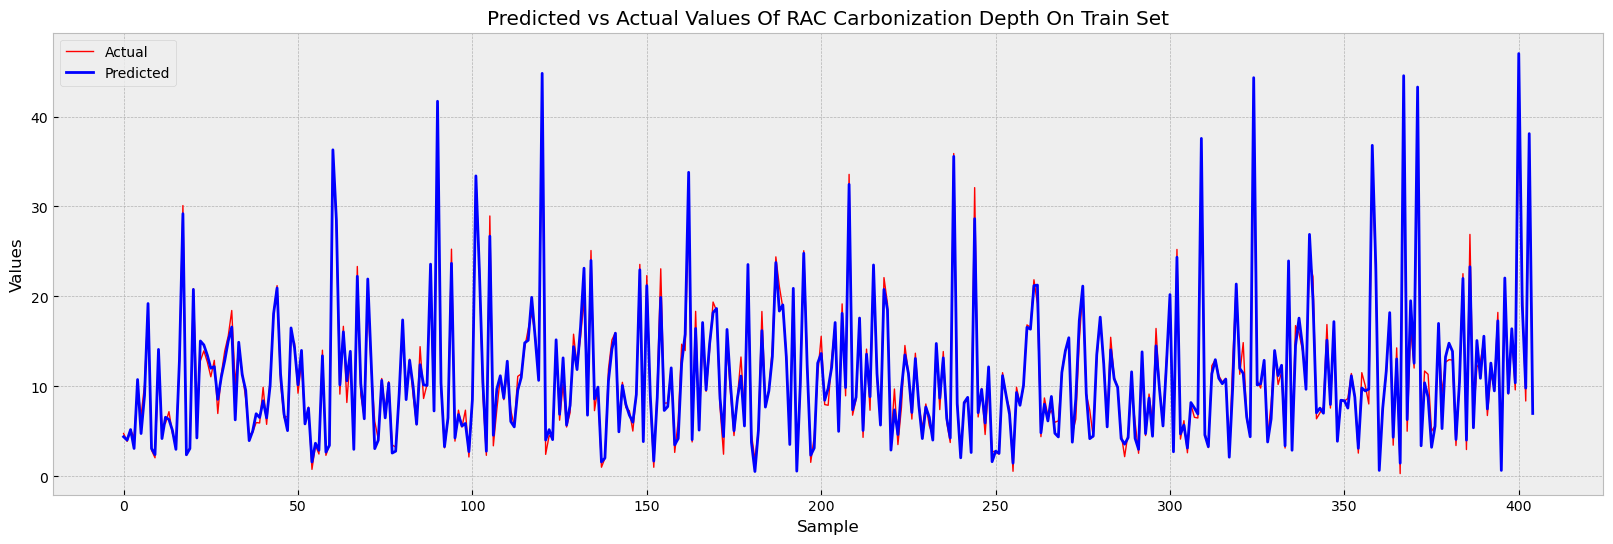

In [ ]:
c_predicted = model_opt_c.predict(X_train_c)

plt.figure(figsize=(20, 6))
plt.plot(c_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_train_c, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Carbonization Depth On Train Set')
plt.legend()
plt.show()

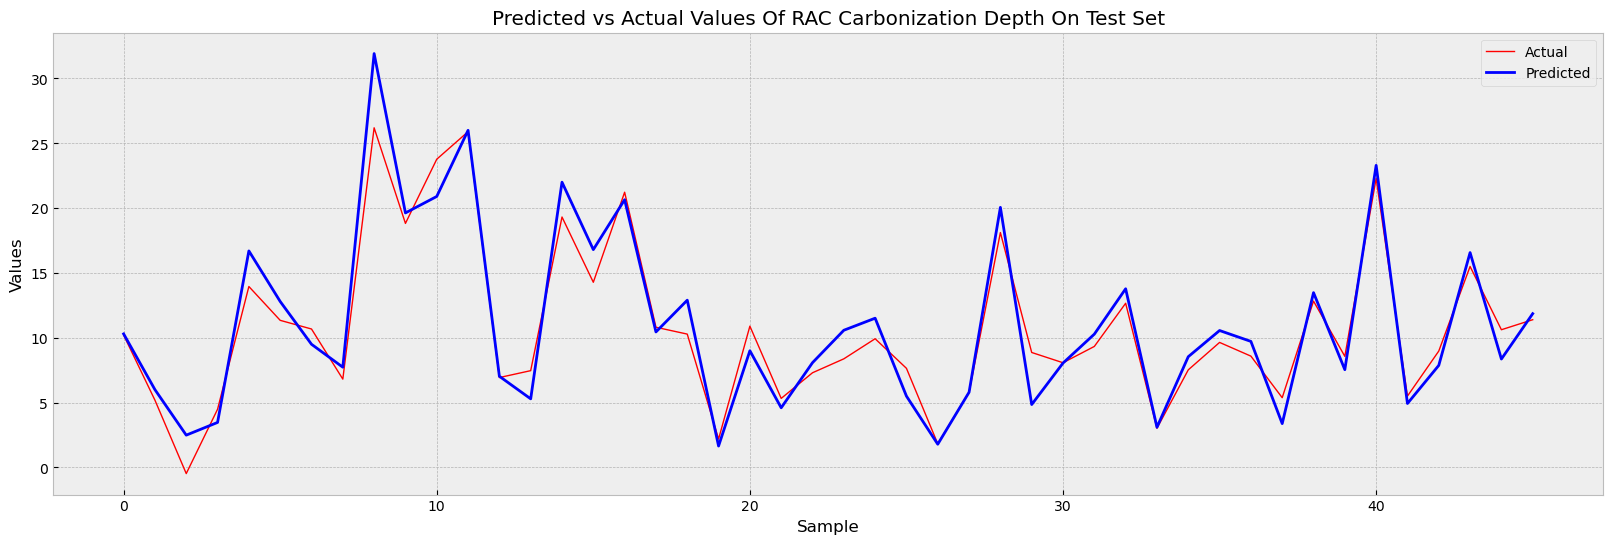

In [ ]:
c_predicted = model_opt_c.predict(X_test_c)

plt.figure(figsize=(20, 6))
plt.plot(c_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_c, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Carbonization Depth On Test Set')
plt.legend()
plt.show()

0.9963958441783672


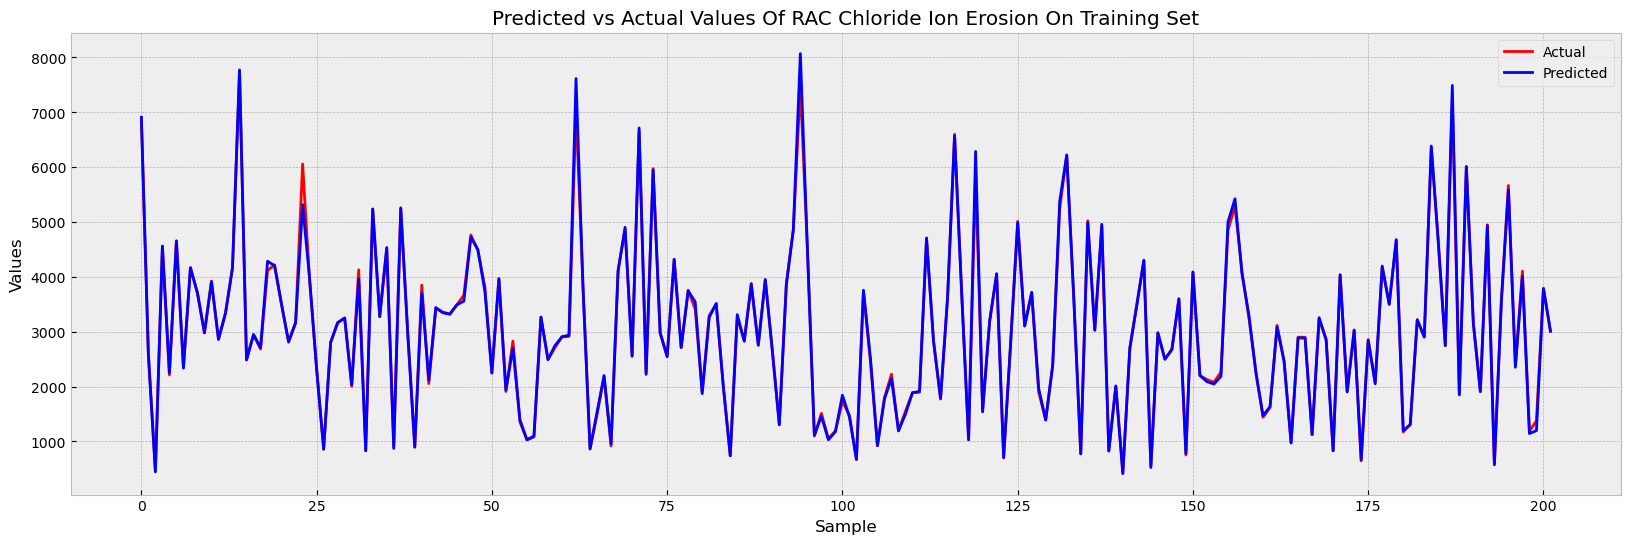

In [ ]:
yhat =model_opt_cl.predict(X_train_cl)
r_squared = r2_score(Y_train_cl, yhat)
print(r_squared)
cl_predicted = model_opt_cl.predict(X_train_cl)

plt.figure(figsize=(20, 6))
plt.plot(cl_predicted, color='red', label='Actual')
plt.plot(Y_train_cl, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Chloride Ion Erosion On Training Set')
plt.legend()
plt.show()

In [ ]:
yhat =model_opt_cl.predict(X_test_cl)
r_squared = r2_score(Y_test_cl, yhat)
r_squared

0.9540851277593169

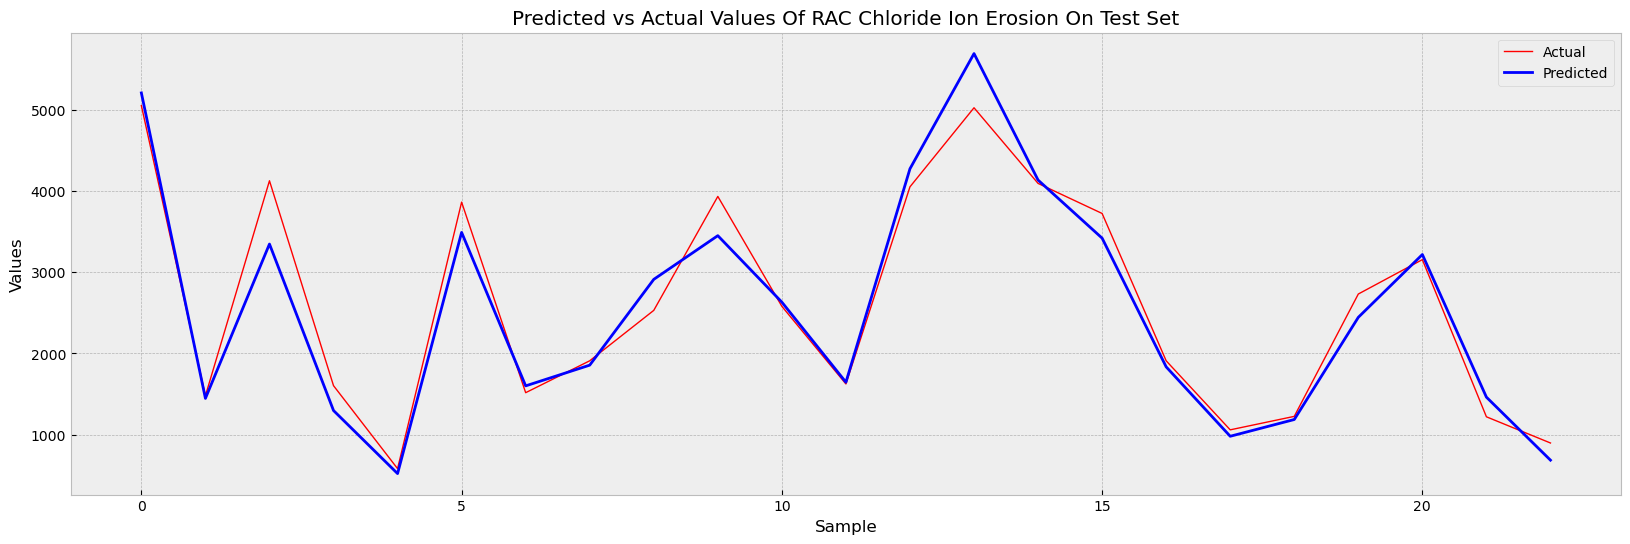

In [ ]:
cl_predicted = model_opt_cl.predict(X_test_cl)

plt.figure(figsize=(20, 6))
plt.plot(cl_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_cl, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Chloride Ion Erosion On Test Set')
plt.legend()
plt.show()

0.9947415003055488


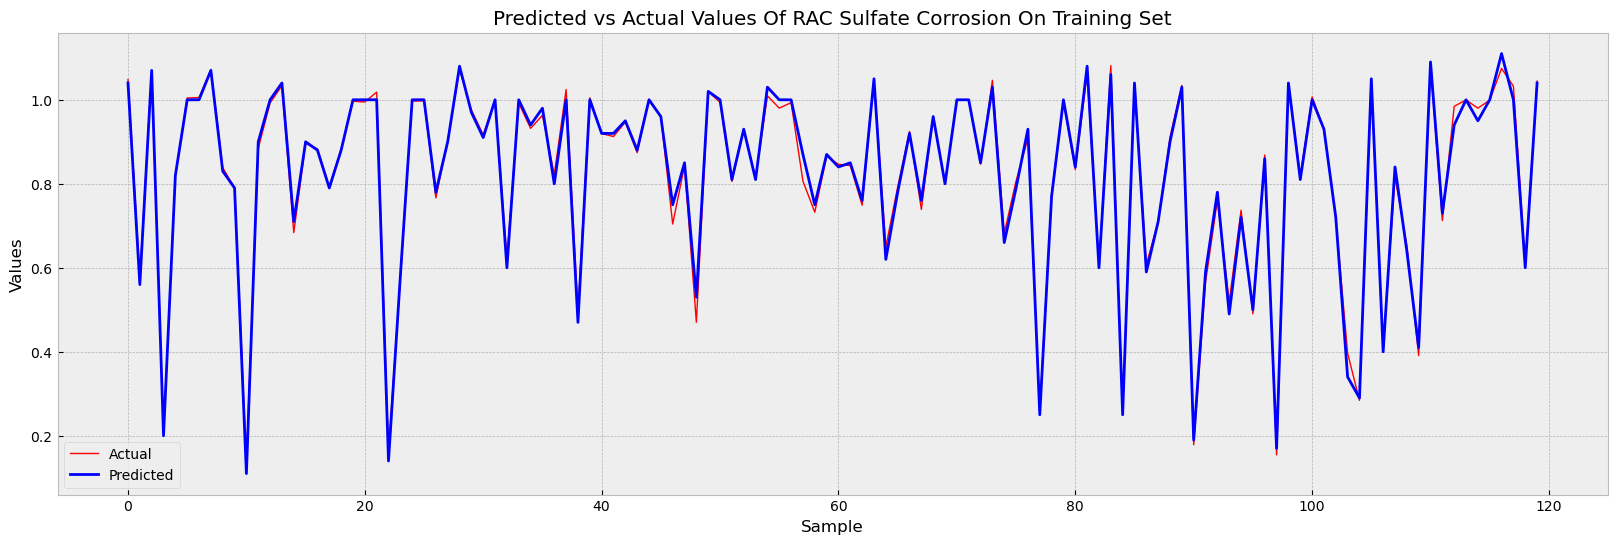

In [ ]:
yhat =model_opt_sf.predict(X_train_sf)
r_squared = r2_score(Y_train_sf, yhat)
print(r_squared)
sf_predicted = model_opt_sf.predict(X_train_sf)

plt.figure(figsize=(20, 6))
plt.plot(sf_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_train_sf, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Sulfate Corrosion On Training Set')
plt.legend()
plt.show()

In [ ]:
yhat =model_opt_sf.predict(X_test_sf)
r_squared = r2_score(Y_test_sf, yhat)
r_squared

0.8775381393119359

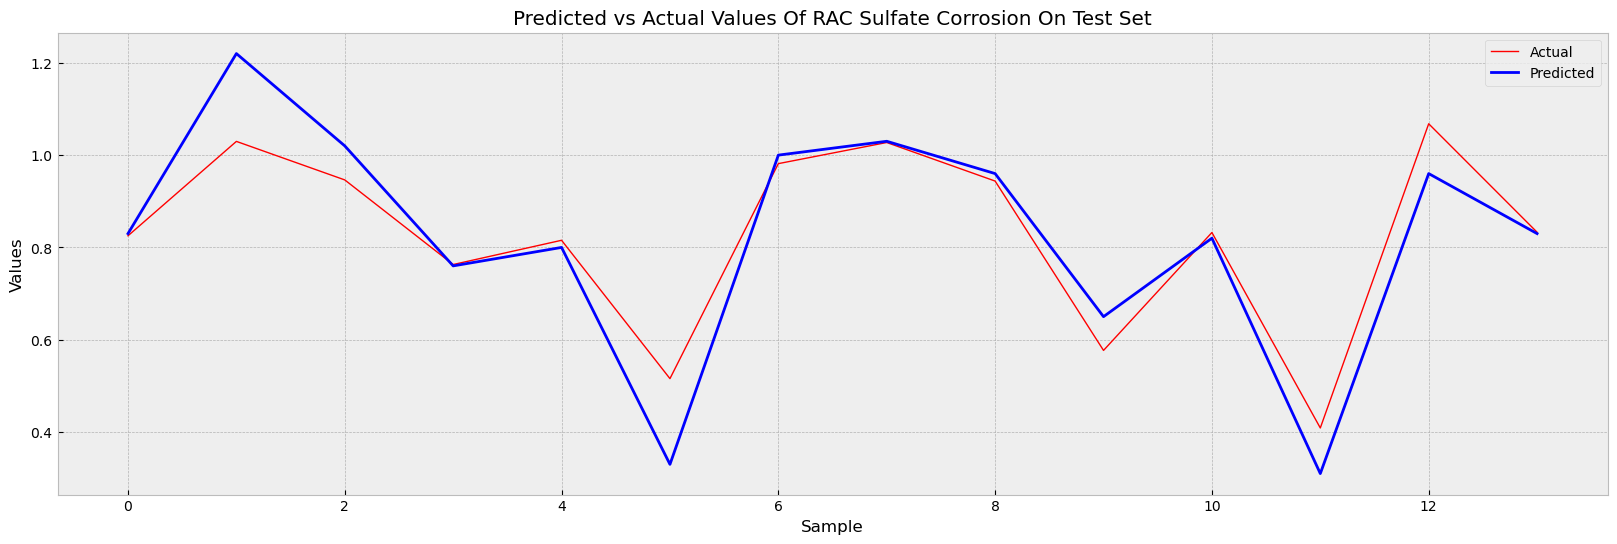

In [ ]:
sf_predicted = model_opt_sf.predict(X_test_sf)

plt.figure(figsize=(20, 6))
plt.plot(sf_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_sf, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Sulfate Corrosion On Test Set')
plt.legend()
plt.show()

### Exporting Trained Models For Future Use Of Predictions

In [ ]:
import joblib

In [ ]:

joblib.dump(XGB_detailed, 'RAC Strength Prediction.pkl')
joblib.dump(GBDT_cs,'NAC Strength Prediction.pkl')
joblib.dump(GBDT_cl,'RAC Chloride Ion Prediction.pkl')
joblib.dump(GBDT_c,'RAC Carbonization Prediction.pkl')
joblib.dump(GBDT_sf,'RAC Sulfate Corrosion Prediction.pkl')


['RAC Sulfate Corrosion Prediction.pkl']